# Import data and libraries


Importing libraries required for our analysis code

In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Importing the dataframe

In [394]:
df=pd.read_csv('DM2425_ABCDEats_DATASET.csv',delimiter=',')
#df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

# Helper functions

These new functions will help in our analisys

In [397]:
def detect_outliers_in_column(df, column, threshold=1.5):
    # Calculate the first and third quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # Compute the Interquartile Range (IQR) as the difference between Q3 and Q1
    IQR = Q3 - Q1
    # Define the lower bound for outliers
    lower_bound = Q1 - threshold * IQR
    # Define the upper bound for outliers
    upper_bound = Q3 + threshold * IQR
    # Identify rows where the column's value is below the lower bound or above the upper bound
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    # Return a DataFrame containing only the outlier rows
    return outliers

# General look at the data

In [399]:
#Looking at the first 5 rows of the dataframe
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [400]:
# Display concise summary of the DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [401]:
# Provides the main statistics for each numeric column in the DataFrame
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [402]:
# Provides main statistics for each object column in the DataFrame
df.describe(include=['object'])

,customer_id,customer_region,last_promo,payment_method
count,31888,31888,31888,31888
unique,31875,9,4,3
top,742ca068fc,8670,-,CARD
freq,2,9761,16748,20161


# Lets check for duplicates

Let`s see if there are any duplicates rows in the dataset

In [405]:
print('There are '+str(df.duplicated().sum()) +' duplicated rows in the dataset')

There are 13 duplicated rows in the dataset


We will remove this duplicated rows to avoid errors caused by repeated indices

In [407]:
# Remove duplicate rows from the DataFrame and reassign the result to df
df=df.drop_duplicates()
# Count the number of remaining duplicate rows in the DataFrame after dropping duplicates
df.duplicated().sum()

0

# Let`s check for missing values

Visualize the percentage of missing values for each column in the DataFrame

In [410]:
# Calculate the percentage of missing values for each column, in descending order
(df.isna().mean()*100).sort_values(ascending=False)

HR_0                        3.651765
customer_age                2.280784
first_order                 0.332549
customer_id                 0.000000
HR_10                       0.000000
DOW_6                       0.000000
HR_1                        0.000000
HR_2                        0.000000
HR_3                        0.000000
HR_4                        0.000000
HR_5                        0.000000
HR_6                        0.000000
HR_7                        0.000000
HR_8                        0.000000
HR_9                        0.000000
HR_12                       0.000000
HR_11                       0.000000
DOW_4                       0.000000
HR_13                       0.000000
HR_14                       0.000000
HR_15                       0.000000
HR_16                       0.000000
HR_17                       0.000000
HR_18                       0.000000
HR_19                       0.000000
HR_20                       0.000000
HR_21                       0.000000
H

# Analising original variables

In this section of the analysis, we will examine each variable to understand their distributions and identify any potential issues. Our goal is to derive valuable insights from this exploration

## Let`s analise the customer_id variable

The customer_id variable is a unique identifier for each customer

We will set customer_id as the index of your DataFrame, it is beneficial because it uniquely identifies each customer, making it easier to locate, access, and manage individual customer data efficiently. To do this we need to check if there is repeated ids.

Let's examine the key statistics for this variable:

In [417]:
df['customer_id'].describe()

count          31875
unique         31875
top       1b8f824d5e
freq               1
Name: customer_id, dtype: object

There are no repeated id`s because the count is equal to unique

In [419]:
print('The customer_id variable has ' + str(df['customer_id'].isna().mean()*100) + '% of missing values')

The customer_id variable has 0.0% of missing values


There is no dublicated ids so we will set this variable as the index

In [421]:
#Defines the column costumer_id as index of dataframe and applies the modification to the dataframe
df.set_index('customer_id', inplace=True)

## Let`s analise the customer_age variable

The customer_age variable represents the age of the costumer

Let's examine the key statistics for this variable:

In [425]:
df['customer_age'].describe()

count    31148.000000
mean        27.507545
std          7.161828
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         80.000000
Name: customer_age, dtype: float64

In [426]:
print('The customer_age variable has ' + str(df['customer_age'].isna().mean()*100) + '% of missing values')

The customer_age variable has 2.28078431372549% of missing values


Since our clustering model cannot accommodate missing values, we will address this issue during the preprocessing stage.

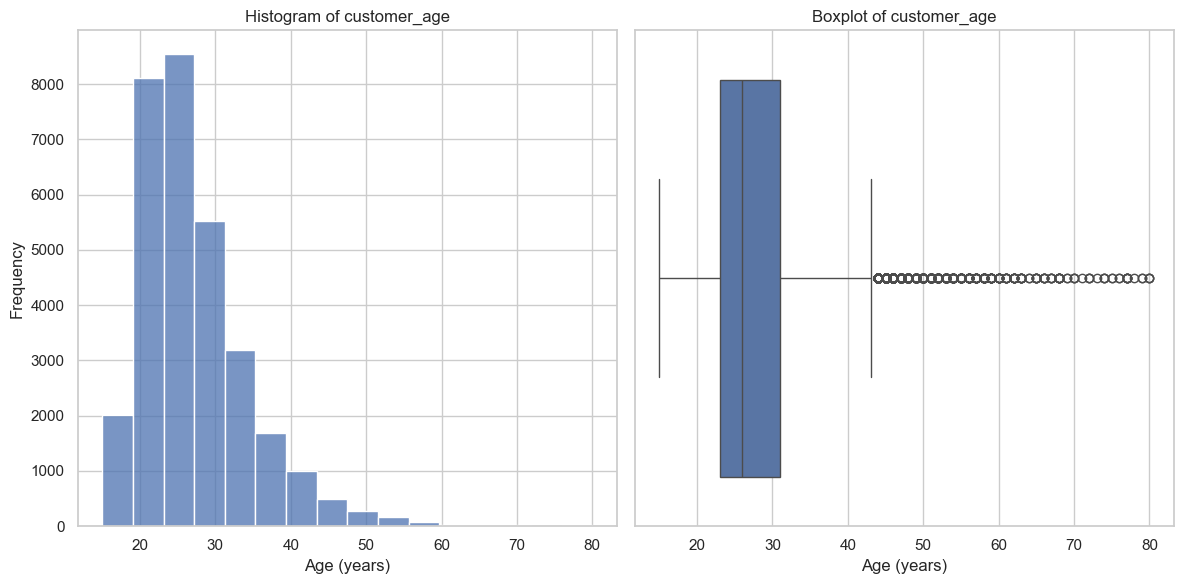

In [428]:
# First subplot: Histogram of customer_age
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
sns.histplot(df['customer_age'], bins=16, kde=False)  # Plot the histogram of customer age with 16 bins (intervals)
plt.title('Histogram of customer_age')  # Set the title of the histogram
plt.xlabel('Age (years)', fontsize=12)  # Label for the x-axis indicating age
plt.ylabel('Frequency', fontsize=12)  # Label for the y-axis indicating frequency

# Second subplot: Boxplot of customer_age
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the histogram
sns.boxplot(x=df['customer_age'])  # Plot the boxplot for the customer age column
plt.title('Boxplot of customer_age')  # Set the title of the boxplot
plt.xlabel('Age (years)', fontsize=12)  # Label for the x-axis indicating age

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

By examining this histogram and boxplot, we can see that the age distribution is asymmetric. This is likely due to outliers, which we can visualize in the boxplot.

We will obtain this outliers represented in the boxplot using the inter quartis technique

In [431]:
detect_outliers_in_column(df,'customer_age')['customer_age'].sort_values()

customer_id
f4afb20885    44.0
f48b178ab2    44.0
6dfdf625fa    44.0
63d635d8df    44.0
ee3ff30383    44.0
              ... 
a956a51629    79.0
1c15824d4f    79.0
65ab5e9447    80.0
629eabf9d5    80.0
5420563227    80.0
Name: customer_age, Length: 1083, dtype: float64

For improved visualization of our data, we will temporarily exclude the outliers

In [433]:
# Create a copy of the original DataFrame to avoid modifying the original dataframe
df_age=df.copy()
# Filter the DataFrame to exclude outliers (ages less than 44 years)
df_age=df_age[df_age['customer_age']<44]

Same visualisation as before but without the outliers

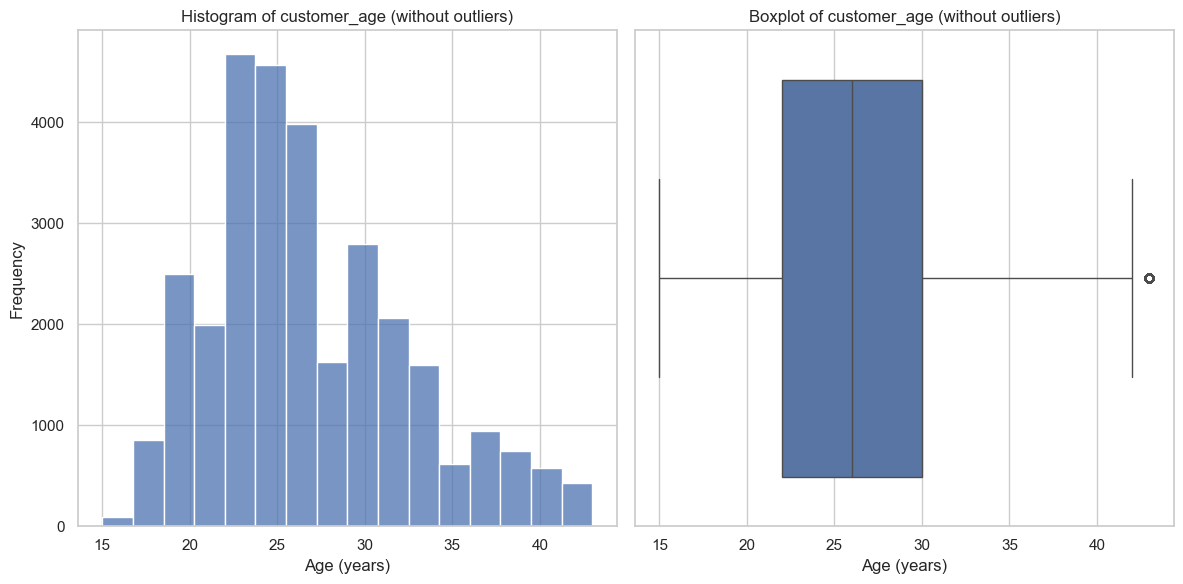

In [435]:
# First subplot: Histogram of customer_age
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
sns.histplot(df_age['customer_age'], bins=16, kde=False)  # Plot the histogram of customer age with 16 bins (intervals)
plt.title('Histogram of customer_age (without outliers)')  # Set the title of the histogram
plt.xlabel('Age (years)', fontsize=12)  # Label for the x-axis indicating age
plt.ylabel('Frequency', fontsize=12)  # Label for the y-axis indicating frequency

# Second subplot: Boxplot of customer_age
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the histogram
sns.boxplot(x=df_age['customer_age'])  # Plot the boxplot for the customer age column
plt.title('Boxplot of customer_age (without outliers)')  # Set the title of the boxplot
plt.xlabel('Age (years)', fontsize=12)  # Label for the x-axis indicating age

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

**Observations**
  

* The variable exhibits a positive skew, indicating a concentration of lower values and a longer tail extending toward higher values. This suggests that customer ages are predominantly younger.
*   A significant number of outliers skew toward older age groups. These are not errors but reflect older individuals choosing to use the delivery app.
*   Around 2.3% of values are missing, which is likely attributable to data entry inconsistencies.









## Let`s analise the customer_region variable

The customer_region variable represents the Geographic region where the customer is located.

Let's examine the key statistics for this variable:

In [440]:
df['customer_region'].describe()

count     31875
unique        9
top        8670
freq       9761
Name: customer_region, dtype: object

In [441]:
print('The customer_region variable has ' + str(df['customer_region'].isna().mean()*100) + '% of missing values')

The customer_region variable has 0.0% of missing values


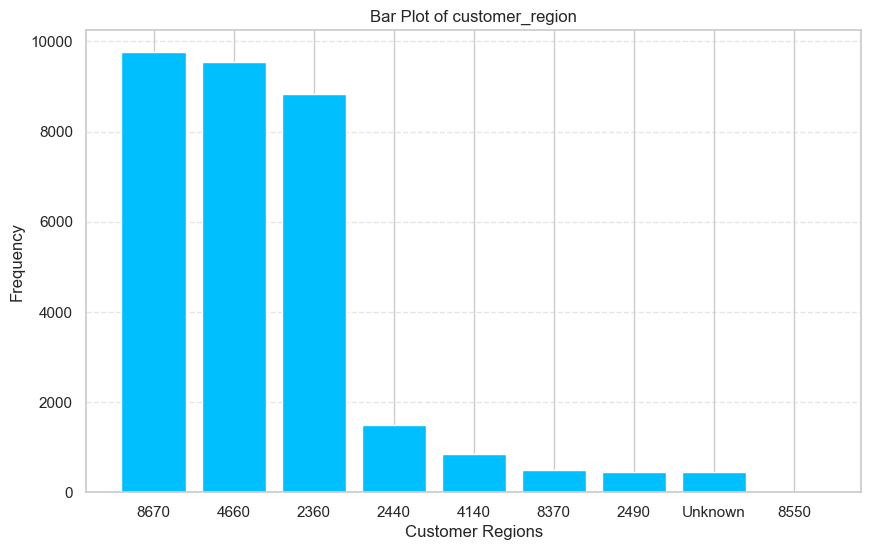

In [442]:
df['customer_region'] = df['customer_region'].replace('-', 'Unknown') # Replace '-' with 'Unknown' in the 'customer_region' column to better visualisation
customer_region_counts = df['customer_region'].value_counts().sort_values(ascending=False) # Count the occurrences of region and sort them in descending order
plt.figure(figsize=(10, 6)) # Set the size of the figure for the bar plot
plt.bar(customer_region_counts.index, customer_region_counts.values, color='deepskyblue') # Create a bar plot of the customer region counts
plt.xlabel('Customer Regions') # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.title('Bar Plot of customer_region') # Set the title of the bar plot
plt.grid(axis='y', linestyle='--', alpha=0.5) # Add a grid to the y-axis
plt.show() # Display the plot

**Observations**
  

* This variable has a category of "-" which means unknown, we should decide if we keep this value or we change it in the next stage
*  No missing values
*   The regions with more clients are 8670, 4660, 2360

## Let`s analise the vendor_count variable

The vendor_count variable represents the number of unique vendors the customer has ordered from.

Let's examine the key statistics for this variable:

In [447]:
df['vendor_count'].describe()

count    31875.000000
mean         3.102714
std          2.771753
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         41.000000
Name: vendor_count, dtype: float64

In [448]:
print('The vendor_count variable has ' + str(df['vendor_count'].isna().mean()*100) + '% of missing values')

The vendor_count variable has 0.0% of missing values


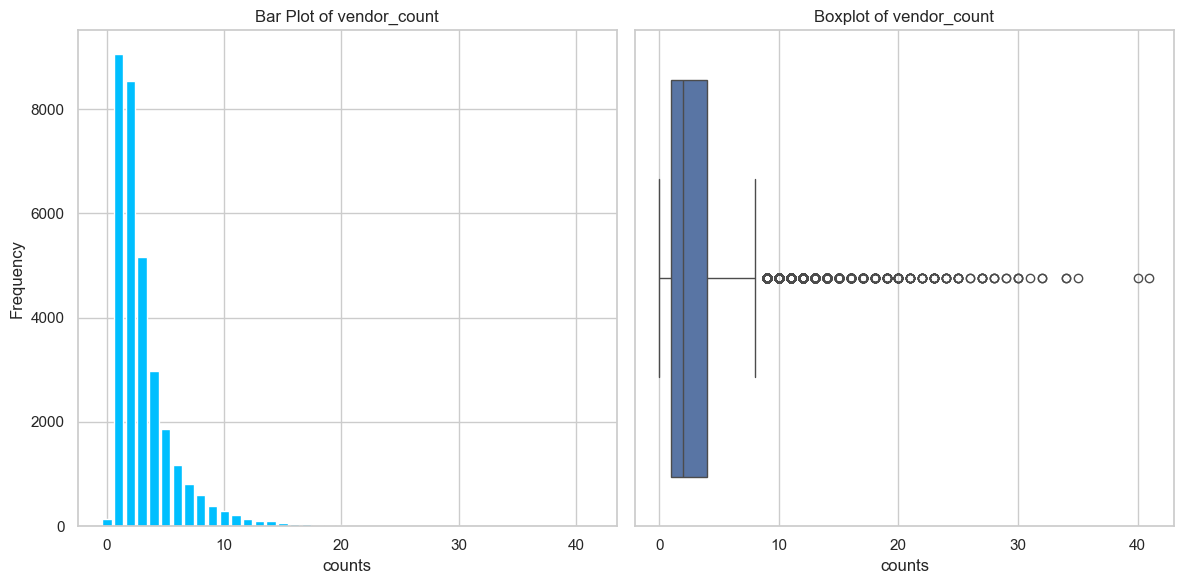

In [449]:
vendor_counts = df['vendor_count'].value_counts().sort_index()
# First subplot: Bar Plot of vendor_count
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
plt.bar(vendor_counts.index, vendor_counts.values, color='deepskyblue') # Create a bar plot of the vendor counts
plt.title('Bar Plot of vendor_count') # Set the title of the bar plot
plt.xlabel('counts',fontsize=12) # Label the x-axis
plt.ylabel('Frequency',fontsize=12)  # Label the y-axis

# Second subplot: Boxplot of vendor_count
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the bar plot
sns.boxplot(x=df['vendor_count']) # Plot the boxplot for the vendor_count
plt.title('Boxplot of vendor_count')  # Set the title of the boxplot
plt.xlabel('counts', fontsize=12) # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

Examining the bar plot reveals an asymmetric vendor_count distribution, likely influenced by outliers, as shown in the boxplot. These outliers are unlikely to be data errors; they probably represent clients who simply decided to make more orders.

We will obtain this outliers represented in the boxplot using the inter quartis technique

In [452]:
detect_outliers_in_column(df,'vendor_count')['vendor_count'].sort_values()

customer_id
47cd9589d2     9
7cc156c53d     9
e2b48611a0     9
a5e5a6cf7c     9
057dc4e4a7     9
              ..
9870fd931f    34
0ff44f1053    34
4b4f32ffc1    35
92ced2dcb9    40
89b7866691    41
Name: vendor_count, Length: 1523, dtype: int64

To get better visualisations, we will exclude the outliers for now:



In [454]:
# Create a copy of the original DataFrame to avoid modifying the original dataframe
df_vendor_count=df.copy()
# Filter the DataFrame to exclude outliers (counts less than 9)
df_vendor_count=df_vendor_count[df_vendor_count['vendor_count']<9]

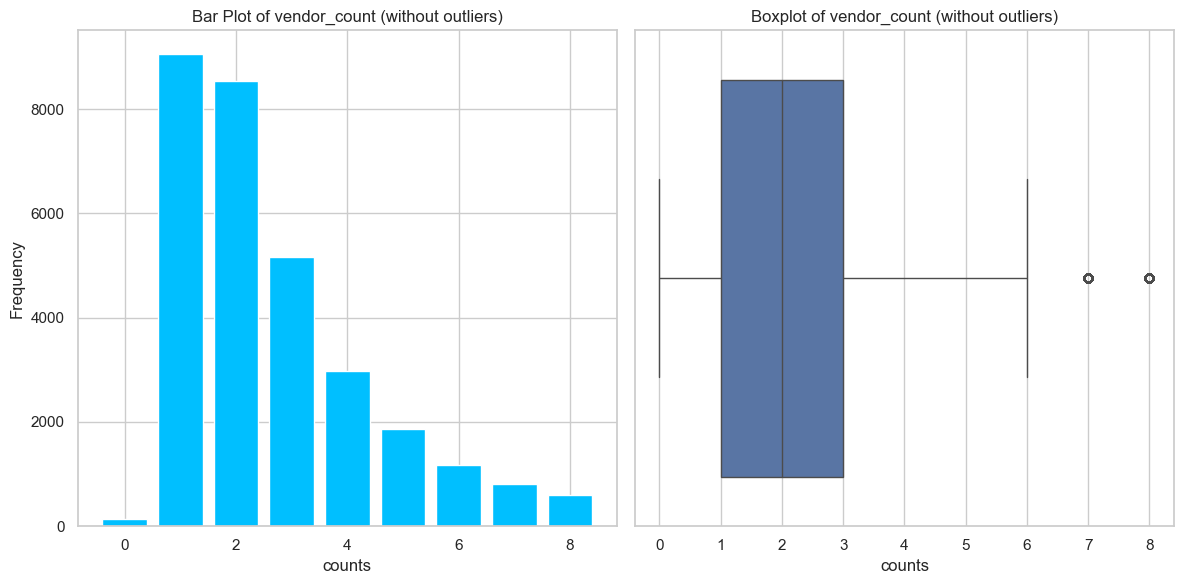

In [455]:
vendor_counts = df_vendor_count['vendor_count'].value_counts().sort_index()
# First subplot: Bar Plot of vendor_count
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
plt.bar(vendor_counts.index, vendor_counts.values, color='deepskyblue') # Create a bar plot of the vendor counts
plt.title('Bar Plot of vendor_count (without outliers)') # Set the title of the bar plot
plt.xlabel('counts',fontsize=12) # Label the x-axis
plt.ylabel('Frequency',fontsize=12)  # Label the y-axis

# Second subplot: Boxplot of vendor_count
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the bar plot
sns.boxplot(x=df_vendor_count['vendor_count']) # Plot the boxplot for the vendor_count
plt.title('Boxplot of vendor_count (without outliers)')  # Set the title of the boxplot
plt.xlabel('counts', fontsize=12) # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

**Observations**
  

* The variable shows a positive skew, with a concentration of lower values and a longer tail extending toward higher values.
*  A significant number of outliers skew toward higher counts. These are not errors but refer to costumer that made a higher number of orders
*   No missing values

## Let`s analise the product_count variable

The product_count variable represents the total number of products the customer has ordered.


Let's examine the key statistics for this variable:

In [460]:
df['product_count'].describe()

count    31875.000000
mean         5.668424
std          6.957933
min          0.000000
25%          2.000000
50%          3.000000
75%          7.000000
max        269.000000
Name: product_count, dtype: float64

In [461]:
print('The product_count variable has ' + str(df['product_count'].isna().mean()*100) + '% of missing values')

The product_count variable has 0.0% of missing values


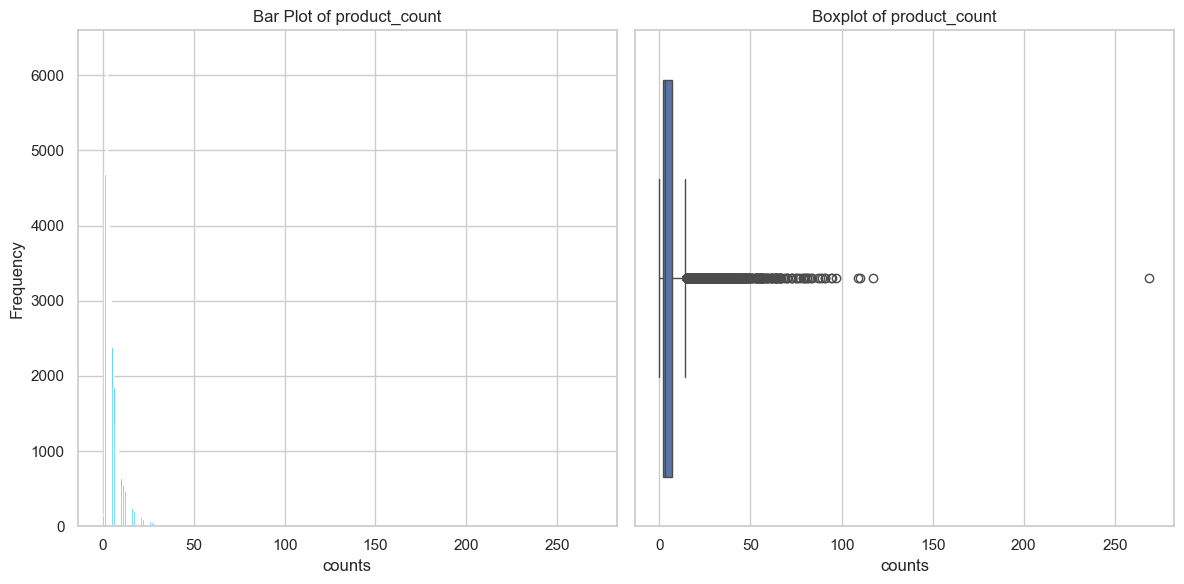

In [462]:
product_count = df['product_count'].value_counts().sort_index()
# First subplot: Bar Plot of product_count
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
plt.bar(product_count.index, product_count.values, color='deepskyblue') # Create a bar plot of the product counts
plt.title('Bar Plot of product_count') # Set the title of the bar plot
plt.xlabel('counts',fontsize=12) # Label the x-axis
plt.ylabel('Frequency',fontsize=12)  # Label the y-axis

# Second subplot: Boxplot of product_count
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the bar plot
sns.boxplot(x=df['product_count']) # Plot the boxplot for the product_count
plt.title('Boxplot of product_count')  # Set the title of the boxplot
plt.xlabel('counts', fontsize=12) # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

Analyzing the boxplot, we observe an outlier that stands very far from the other values, representing an extreme point that could negatively impact our analysis and visualization. To mitigate this, we will adjust it to a more reasonable high value.

In [464]:
df['product_count'].max()

269

In [465]:
print(df[df['product_count']==269].index)

Index(['92ced2dcb9'], dtype='object', name='customer_id')


In [466]:
df.loc['92ced2dcb9','product_count']=100

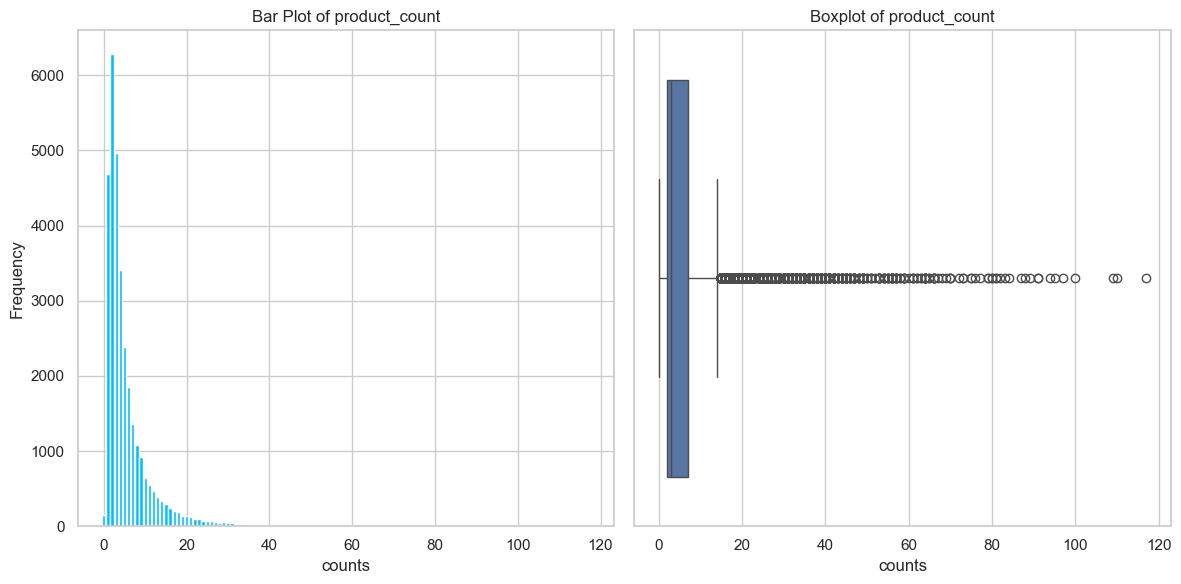

In [467]:
product_count = df['product_count'].value_counts().sort_index()
# First subplot: Bar Plot of product_count
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
plt.bar(product_count.index, product_count.values, color='deepskyblue') # Create a bar plot of the product counts
plt.title('Bar Plot of product_count') # Set the title of the bar plot
plt.xlabel('counts',fontsize=12) # Label the x-axis
plt.ylabel('Frequency',fontsize=12)  # Label the y-axis

# Second subplot: Boxplot of product_count
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the bar plot
sns.boxplot(x=df['product_count']) # Plot the boxplot for the product_count
plt.title('Boxplot of product_count')  # Set the title of the boxplot
plt.xlabel('counts', fontsize=12) # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

In these variable, there is still outliers that make the visualisation harder. These outliers are unlikely to be data errors, they probably represent clients who simply decided to buy more products.

We will obtain this outliers using the inter quartiles technique

In [470]:
detect_outliers_in_column(df,'product_count')['product_count'].sort_values()

customer_id
81edb5d108     15
51c3de7464     15
a64d20b035     15
610bf919e0     15
52828f3ebf     15
             ... 
9870fd931f     97
92ced2dcb9    100
d798652ec0    109
89b7866691    110
910e70571d    117
Name: product_count, Length: 2370, dtype: int64

To get better visualisations, we will exclude the outliers for now:

In [472]:
# Create a copy of the original DataFrame to avoid modifying the original dataframe
df_product_count=df.copy()
# Filter the DataFrame to exclude outliers (counts less than 15)
df_product_count=df_product_count[df_product_count['product_count']<15]

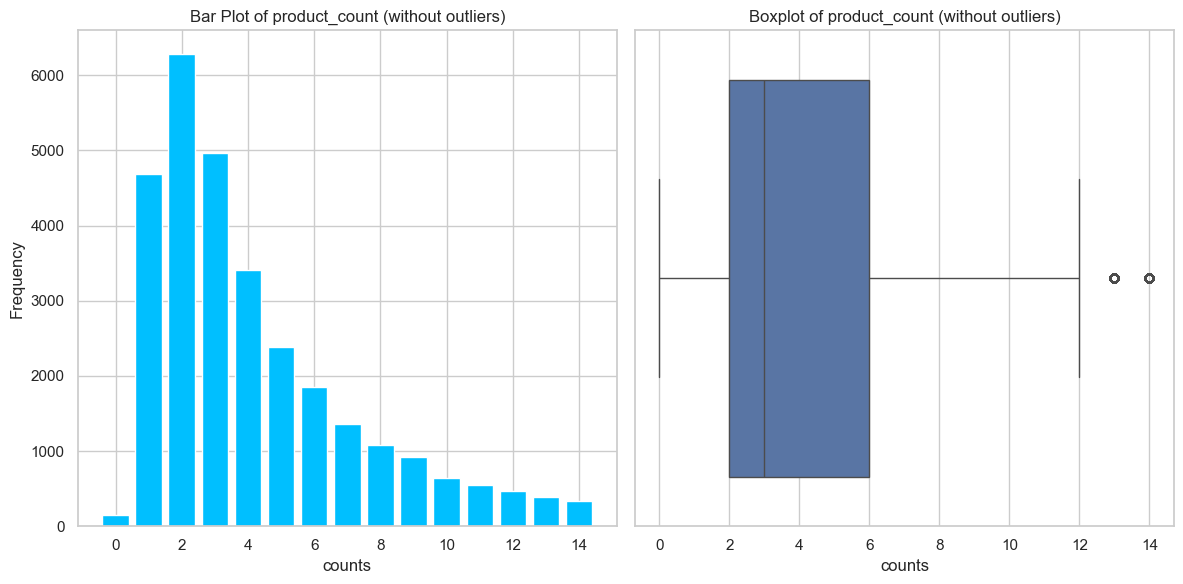

In [473]:
product_count = df_product_count['product_count'].value_counts().sort_index()
# First subplot: Bar Plot of product_count
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
plt.bar(product_count.index, product_count.values, color='deepskyblue') # Create a bar plot of the product counts
plt.title('Bar Plot of product_count (without outliers)') # Set the title of the bar plot
plt.xlabel('counts',fontsize=12) # Label the x-axis
plt.ylabel('Frequency',fontsize=12)  # Label the y-axis

# Second subplot: Boxplot of product_count
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the bar plot
sns.boxplot(x=df_product_count['product_count']) # Plot the boxplot for the product_count
plt.title('Boxplot of product_count (without outliers)')  # Set the title of the boxplot
plt.xlabel('counts', fontsize=12) # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

**Observations**

*   The variable shows a positive skew, with a concentration of lower values and a longer tail extending toward higher values.
*   A significant number of outliers skew toward higher counts. These are not errors but refer to costumer that made a higher number of product purchages in their orders
*   No missing values

## Let`s analise the first_order and last_order variables

The first_order variable represents the number of days from the start of the dataset when the customer first placed an order.

The last_order variable represents the number of days from the start of the dataset when the customer most recently placed an order.


Let's examine the key statistics of this variables:

In [478]:
df['first_order'].describe()

count    31769.000000
mean        28.469924
std         24.104626
min          0.000000
25%          7.000000
50%         22.000000
75%         45.000000
max         90.000000
Name: first_order, dtype: float64

In [479]:
df['last_order'].describe()

count    31875.000000
mean        63.672376
std         23.227992
min          0.000000
25%         49.000000
50%         70.000000
75%         83.000000
max         90.000000
Name: last_order, dtype: float64

In [480]:
print('The first_order variable has ' + str(df['first_order'].isna().mean()*100) + '% of missing values')
print('The last_order variable has ' + str(df['last_order'].isna().mean()*100) + '% of missing values')

The first_order variable has 0.3325490196078431% of missing values
The last_order variable has 0.0% of missing values


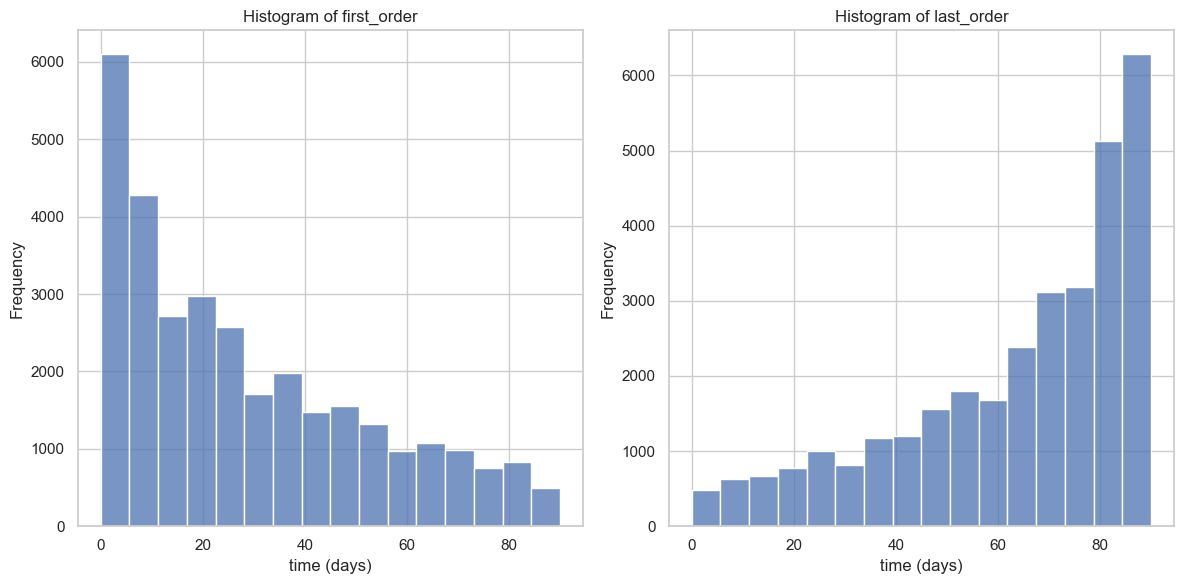

In [481]:
# First subplot: Histogram of first_order
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
sns.histplot(df['first_order'], bins=16) # Create a histogram of first order
plt.title('Histogram of first_order') # Set the title of the histogram
plt.xlabel('time (days)', fontsize=12) # Label the x-axis
plt.ylabel('Frequency',fontsize=12)  # Label the y-axis

# Second subplot: Histogram of last_order
plt.subplot(1, 2, 2)  # Create the first subplot in a grid of 1 row and 2 columns
sns.histplot(df['last_order'], bins=16) # Create a histogram of last order
plt.title('Histogram of last_order') # Set the title of the histogram
plt.xlabel('time (days)', fontsize=12) # Label the x-axis
plt.ylabel('Frequency',fontsize=12)  # Label the y-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

**Observations**

*   Missing values in the first_order variable, will be taken care in prepossessing stage
*   In the first order histogram, the high frequency of values near the beginning (close to 0 days) suggests that a large number of customers placed their first order relatively early in the timeline of the dataset. As the number of days increases, fewer customers are making their first purchase. This pattern could imply that many customers were acquired or joined around the beginning of the dataset period, with fewer new customers joining as time went on.
*   In the last order histogram, the majority of customers have recent activity (high values, near the dataset's end). This distribution suggests that a substantial portion of customers remained active or re-engaged until the end of the dataset period. It could also indicate strong retention or that the business successfully reactivates customers over time.
*   The contrasting shapes of first_order and last_order might also indicate that, while new customer acquisition slowed down over time, existing customers were retained effectively, leading to a stable or even increasing customer activity level toward the end.




## Let`s analise the last_promo variable

The last_promo variable represents the category of the promotion or discount most recently used by the customer.


Let's examine the key statistics of this variables:

In [486]:
df['last_promo'].describe()

count     31875
unique        4
top           -
freq      16744
Name: last_promo, dtype: object

In [487]:
print('The last_promo variable has ' + str(df['last_promo'].isna().mean()*100) + '% of missing values')

The last_promo variable has 0.0% of missing values


This categorical variable has 4 values. Wich are:
- "-": Our interpretation, given the limited information about how this data was collected, suggests that this symbol indicates the client did not utilize any promotions.
- "DELIVERY" - the client used the delivery promotion
- "DISCOUNT" - the client used the discount promotion
- "FREEBIE" - the client used the freebie promotion

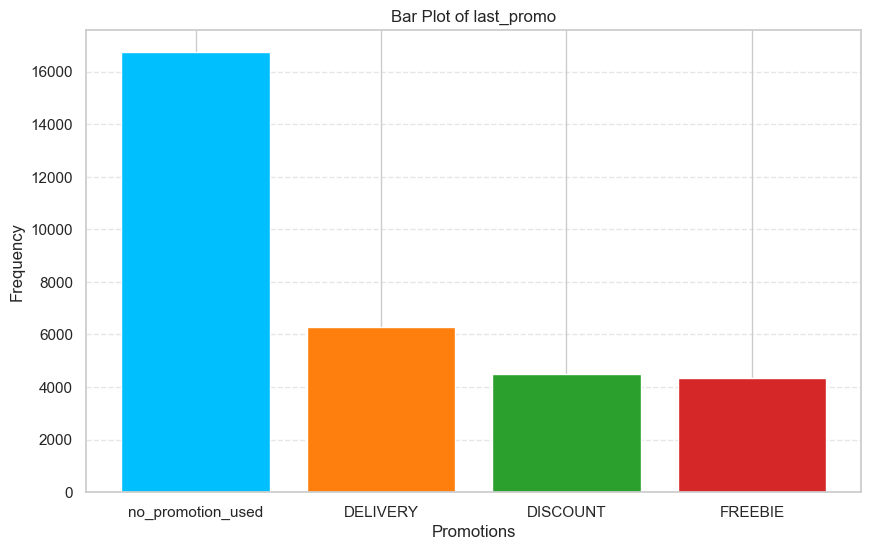

In [489]:
df['last_promo'] = df['last_promo'].replace('-', 'no_promotion_used') # Replace '-' with 'Unknown' in the 'last_promo' column to better visualisation
promo_counts = df['last_promo'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6)) # Set the size of the figure for the bar plot
plt.bar(promo_counts.index, promo_counts.values, color = ['deepskyblue','#ff7f0e','#2ca02c','#d62728']) # Create a bar plot of the last_promo counts
plt.xlabel('Promotions',fontsize=12) # Label the x-axis
plt.ylabel('Frequency',fontsize=12)  # Label the y-axis
plt.title('Bar Plot of last_promo') # Set the title of the bar plot
plt.grid(axis='y', linestyle='--', alpha=0.5) # Add a grid to the y-axis
plt.show() # Display the plot

## Let`s analise the payment_method variable

The payment_method variable represents the method most recently used by the customer to pay for their orders

Let's examine the key statistics of this variables:

In [493]:
df['payment_method'].describe()

count     31875
unique        3
top        CARD
freq      20153
Name: payment_method, dtype: object

In [494]:
print('The payment_method variable has ' + str(df['payment_method'].isna().mean()*100) + '% of missing values')

The payment_method variable has 0.0% of missing values


This categorical variable has 3 values. Wich are:
- "CASH": If the Client used cash as his payment method
- "CARD" - If the Client used card as his payment method
- "DIGI" - If the Client used DIGI as his payment method

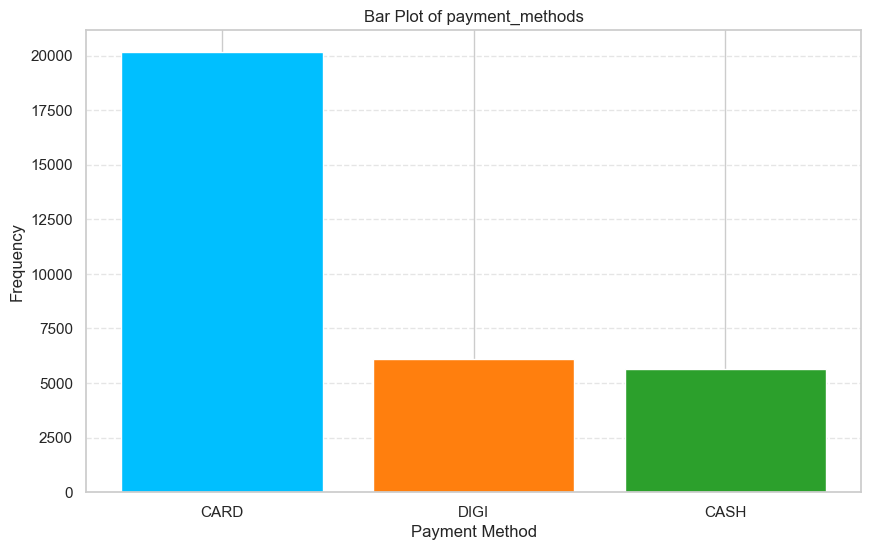

In [496]:
payment_counts = df['payment_method'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6)) # Set the size of the figure for the bar plot
plt.bar(payment_counts.index, payment_counts.values, color = ['deepskyblue','#ff7f0e','#2ca02c']) # Create a bar plot of the payment_method
plt.xlabel('Payment Method',fontsize=12) # Label the x-axis
plt.ylabel('Frequency',fontsize=12)  # Label the y-axis
plt.title('Bar Plot of payment_methods') # Set the title of the bar plot
plt.grid(axis='y', linestyle='--', alpha=0.5) # Add a grid to the y-axis
plt.show() # Display the plot

**Observations**

*   Most of the customers use card as their payment method
*   No missing values

## Lets analise the CUIs variables

The CUI`s variable represents the amount in monetary units spent by the customer from the indicated type of cuisine

Let's examine the key statistics of this variables:

In [501]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
df[cuisine_columns].describe()

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
count,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000
mean,4.877205,9.955306,2.298224,0.801490,0.768409,1.431801,0.884719,0.950590,1.631818,3.234729,2.996031,0.711966,3.001137,3.910391,0.842040
std,11.647043,23.561492,8.475868,6.428422,3.657986,8.193374,5.260910,5.831747,7.444679,11.250094,10.182406,4.537359,9.770104,15.548367,4.433918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,280.210000,896.710000,229.220000,326.100000,219.660000,739.730000,230.070000,255.810000,309.070000,468.330000,706.140000,275.110000,366.080000,454.450000,136.380000


In [502]:
(df[cuisine_columns].isna().mean()*100).sort_values(ascending=False)

CUI_American                0.0
CUI_Asian                   0.0
CUI_Beverages               0.0
CUI_Cafe                    0.0
CUI_Chicken Dishes          0.0
CUI_Chinese                 0.0
CUI_Desserts                0.0
CUI_Healthy                 0.0
CUI_Indian                  0.0
CUI_Italian                 0.0
CUI_Japanese                0.0
CUI_Noodle Dishes           0.0
CUI_OTHER                   0.0
CUI_Street Food / Snacks    0.0
CUI_Thai                    0.0
dtype: float64

In [503]:
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#7F00FF','#FF00FF','#00FFFF','#FFD700','#FF4500']

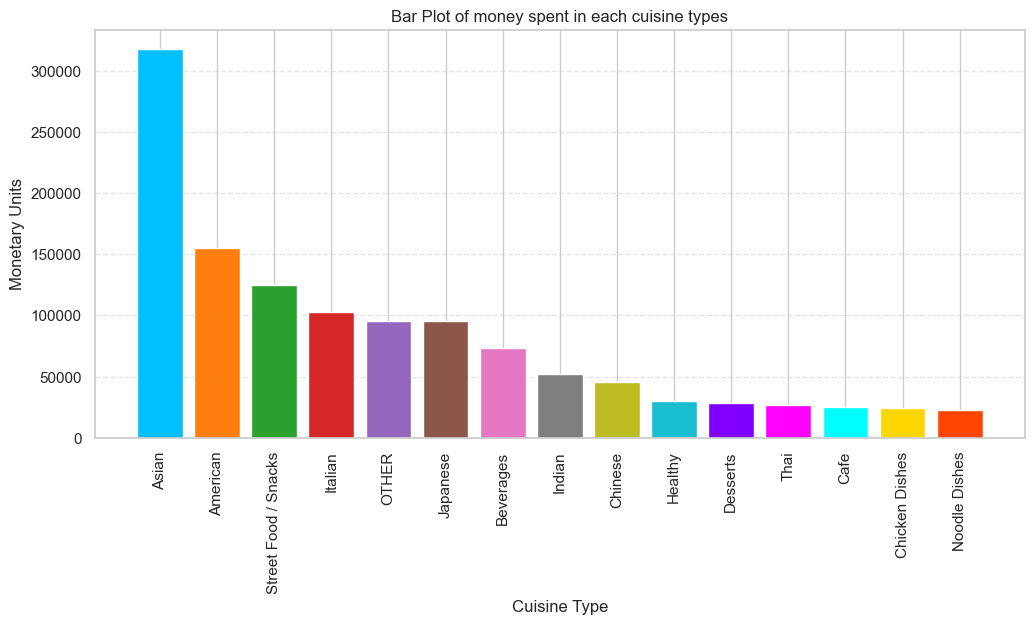

In [504]:
sums_types = df[cuisine_columns].sum().sort_values(ascending=False)
sums_types.index = sums_types.index.str.replace('CUI_', '')
plt.figure(figsize=(12, 6)) # Set the size of the figure for the bar plot
plt.bar(sums_types.index, sums_types.values, color = ['deepskyblue','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#7F00FF','#FF00FF','#00FFFF','#FFD700','#FF4500']) # Create a bar plot of the money spent in each cuisine type
plt.xlabel('Cuisine Type',fontsize=12) # Label the x-axis
plt.ylabel('Monetary Units',fontsize=12)  # Label the y-axis
plt.title('Bar Plot of money spent in each cuisine types') # Set the title of the bar plot
plt.grid(axis='y', linestyle='--', alpha=0.5) # Add a grid to the y-axis
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=90) # Rotate the x-axis labels for better readability
plt.show() # Display the plot

**Observations**

*  The cuisine type with the most money spent is Asian cuisine being followed by the American and Street food/Snacks cuisines
*   No missing values

## Lets analise the DOW`s variables

The DOW`s variables represent the number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).

Let's examine the key statistics of this variables:

In [509]:
days_week_columns = [col for col in df.columns if col.startswith('DOW_')]
df[days_week_columns].describe()

,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
count,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000
mean,0.555922,0.567561,0.590933,0.619388,0.677867,0.652957,0.704408
std,1.013634,1.044190,1.045900,1.069558,1.088284,1.069802,1.167592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,16.000000,17.000000,15.000000,17.000000,16.000000,20.000000,20.000000


In [510]:
(df[days_week_columns].isna().mean()*100).sort_values(ascending=False)

DOW_0    0.0
DOW_1    0.0
DOW_2    0.0
DOW_3    0.0
DOW_4    0.0
DOW_5    0.0
DOW_6    0.0
dtype: float64

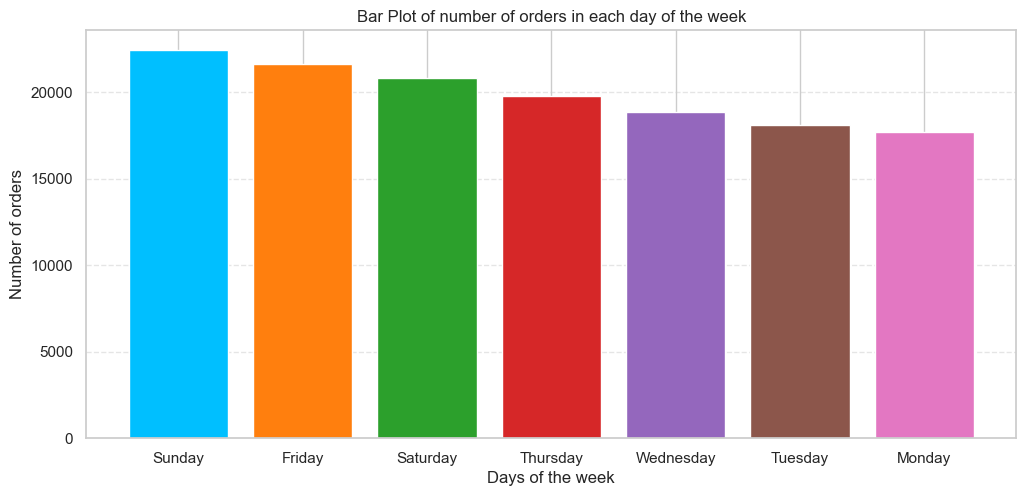

In [511]:
sums_week = df[days_week_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6)) # Set the size of the figure for the bar plot
plt.bar(sums_week.index, sums_week.values, color = ['deepskyblue','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2']) # Create a bar plot of the number of orders made in each day of the week
plt.xlabel('Days of the week',fontsize=12) # Label the x-axis
plt.ylabel('Number of orders',fontsize=12)  # Label the y-axis
plt.title('Bar Plot of number of orders in each day of the week') # Set the title of the bar plot
plt.grid(axis='y', linestyle='--', alpha=0.5) # Add a grid to the y-axis
plt.subplots_adjust(bottom=0.2)
days_of_week = ['Sunday', 'Friday', 'Saturday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
plt.xticks(ticks=range(len(days_of_week)), labels=days_of_week, rotation=0) # Set the x-axis labels to the days of the week
plt.show() # Display the plot

**Observations**

*  The data indicates an increase in orders toward the end of the week and into the weekend, peaking on Sunday. This could reflect customer behavior patterns where people are more likely to shop as they approach or during the weekend.
*   No missing values




## Lets analise the HR`s variables

The HR`s variables represent the number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).


Let's examine the key statistics of this variables:

In [516]:
hours_columns = [col for col in df.columns if col.startswith('HR_')]
df[hours_columns].describe()

,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,30711.0,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,...,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000
mean,0.0,0.053835,0.063153,0.118306,0.101710,0.081914,0.069616,0.076675,0.131859,0.233945,...,0.215686,0.277114,0.356580,0.391059,0.337098,0.245678,0.142871,0.071184,0.048282,0.045176
std,0.0,0.317031,0.351490,0.497117,0.437549,0.358701,0.329307,0.377349,0.635603,0.725015,...,0.599098,0.738282,0.874598,0.943873,0.894106,0.795433,0.586641,0.348604,0.298324,0.282011
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,14.000000,12.000000,11.000000,14.000000,7.000000,8.000000,15.000000,52.000000,23.000000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [517]:
(df[hours_columns].isna().mean()*100).sort_values(ascending=False)

HR_0     3.651765
HR_1     0.000000
HR_22    0.000000
HR_21    0.000000
HR_20    0.000000
HR_19    0.000000
HR_18    0.000000
HR_17    0.000000
HR_16    0.000000
HR_15    0.000000
HR_14    0.000000
HR_13    0.000000
HR_12    0.000000
HR_11    0.000000
HR_10    0.000000
HR_9     0.000000
HR_8     0.000000
HR_7     0.000000
HR_6     0.000000
HR_5     0.000000
HR_4     0.000000
HR_3     0.000000
HR_2     0.000000
HR_23    0.000000
dtype: float64

The variable 'HR_0' contains a value of 0.0 in all rows, indicating either that there were no orders placed at midnight or that there was an error in collecting data for this variable. Additionally, there are 3.65% of missing values. Due to these two issues, we will exclude this variable from our analysis, as it lacks significance.

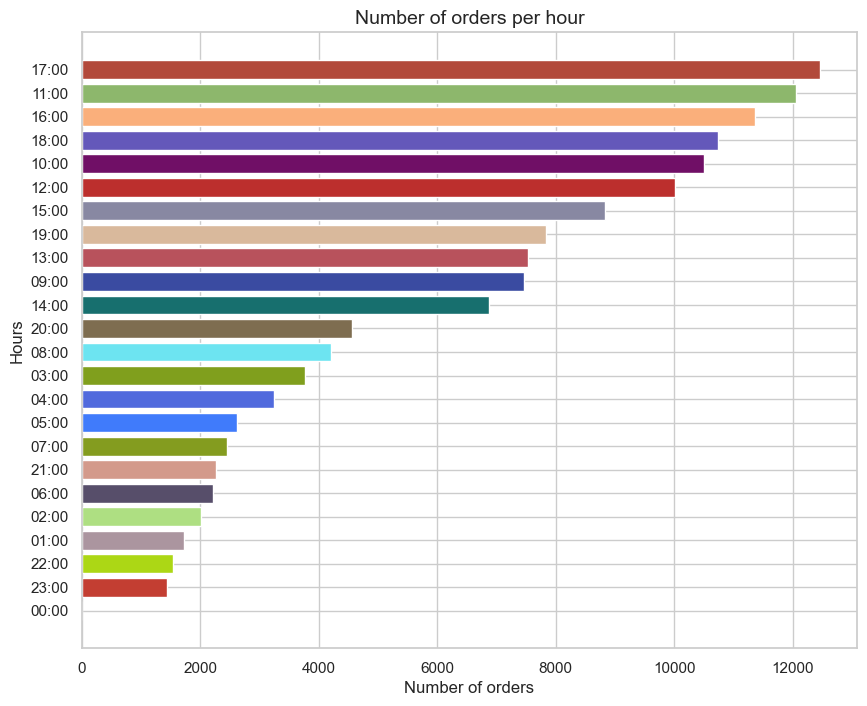

In [519]:
sums_hours = df[hours_columns].sum().sort_values(ascending=False) # Calculate the sum of orders for each hour and sort the results in descending order
sums_hours.index = sums_hours.index.str.replace('HR_', '') # Replace the prefix 'HR_' in the index of sums_hours with an empty string to clean the labels
sums_hours.index = sums_hours.index.astype(int)  # Convert index to integers
sums_hours.index = [f"{hour:02}:00" for hour in sums_hours.index] # Format the index to display the hours in 'HH:MM' format
np.random.seed(123) # Set a random seed for reproducibility of the random color generation
colors = np.random.rand(24, 3)# Generate an array of random colors for the bar plot, with 24 rows (one for each hour)
plt.figure(figsize=(10, 8)) # Set the size of the figure for the bar plot
plt.barh(sums_hours.index, sums_hours.values, color=colors)
plt.xlabel('Number of orders', fontsize=12)
plt.ylabel('Hours', fontsize=12)
plt.title('Number of orders per hour', fontsize=14)
plt.gca().invert_yaxis()

plt.show()


The hours 17 (5 PM) and 11 (11 AM) are the most popular times for placing orders, these peak hours likely represent meal times, where 11 AM may capture late morning orders for the lunch and 5 PM captures early dinner or post-work orders.

Early morning hours, such as 2 AM and 6 AM, and very late night hours, such as 23 (11 PM), have the lowest order volumes cause people don`t usually order food at those times.

**Observations**

*  This distribution suggests that most orders occur during typical meal times, especially late morning to early evening, with a clear spike around lunchtime and dinner time.
*   There are no orders recorded for HR_0 (midnight), which could indicate that the service is closed at this time or that customer activity is extremely low. We will probably drop this column in the preprossesing stage.

## Let`s analise is_chain variable

The is_chain variable in the meta data given to us represent Indicates whether the customer’s order was from a chain restaurant

In [524]:
df['is_chain'].describe()

count    31875.000000
mean         2.819357
std          3.977977
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         83.000000
Name: is_chain, dtype: float64

In [525]:
print('The is_chain variable has ' + str(df['is_chain'].isna().mean()*100) + '% of missing values')

The is_chain variable has 0.0% of missing values


The description given to us doesn`t match the key statistics above because they are not bolean, they have more than two values. So we need to find the real description.

Let`s start by seing the distribution to see if we get a clue

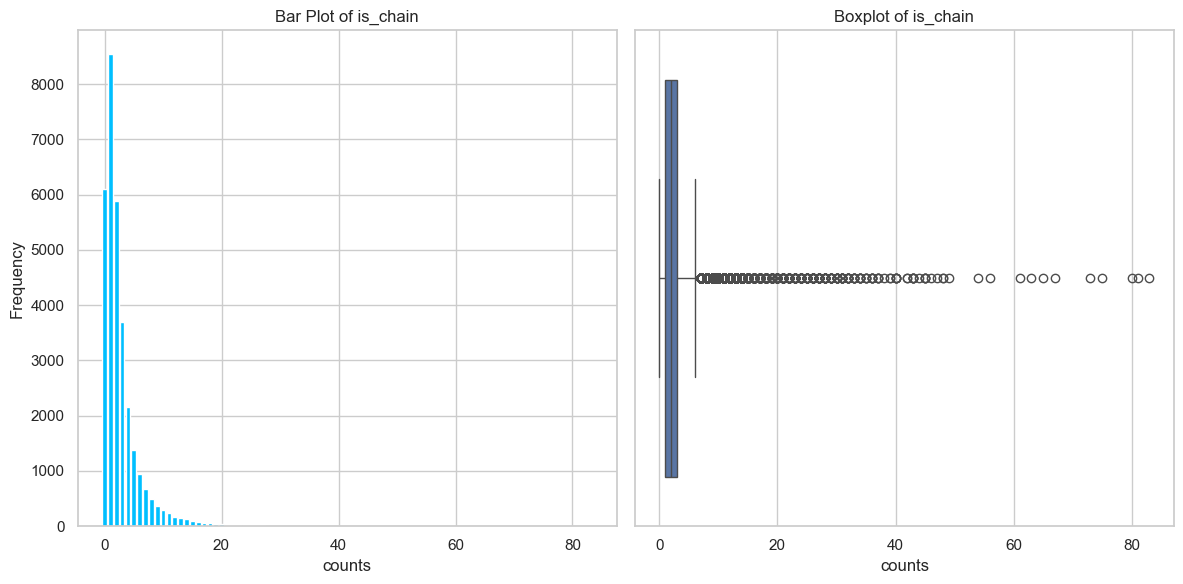

In [528]:
is_chain = df['is_chain'].value_counts().sort_index()
# First subplot: Bar Plot of is_chain
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
plt.bar(is_chain.index, is_chain.values, color='deepskyblue') # Create a bar plot of the is_chain counts
plt.title('Bar Plot of is_chain') # Set the title of the bar plot
plt.xlabel('counts',fontsize=12) # Label the x-axis
plt.ylabel('Frequency',fontsize=12)  # Label the y-axis

# Second subplot: Boxplot of is_chain
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the bar plot
sns.boxplot(x=df['is_chain']) # Plot the boxplot for the is_chain
plt.title('Boxplot of is_chain')  # Set the title of the boxplot
plt.xlabel('counts', fontsize=12) # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

This distribution is very similar to the vendor_count distribution so we can conclude that is_chain gives us the number of times the costumer ordered from a chain restaurant

Examining the boxplot reveals an asymmetric is_chain distribution, likely influenced by outliers, as shown in the boxplot. These outliers are unlikely to be data errors; they probably represent clients who simply decided to make more orders.

We will obtain this outliers reprsented in the boxplot using the inter quartis technique

In [532]:
detect_outliers_in_column(df,'is_chain')['is_chain'].sort_values()

customer_id
37c312f839     7
50c0ed4fc1     7
a55c9a9975     7
6c21533c45     7
eef1b04279     7
              ..
89b7866691    73
e1491fb8f7    75
4b5be62a93    80
92ced2dcb9    81
d798652ec0    83
Name: is_chain, Length: 3154, dtype: int64

To get better visualisations, we will exclude the outliers for now:

In [534]:
# Create a copy of the original DataFrame to avoid modifying the original dataframe
df_is_chain=df.copy()
# Filter the DataFrame to exclude outliers (counts less than 7)
df_is_chain=df_is_chain[df_is_chain['is_chain']<7]

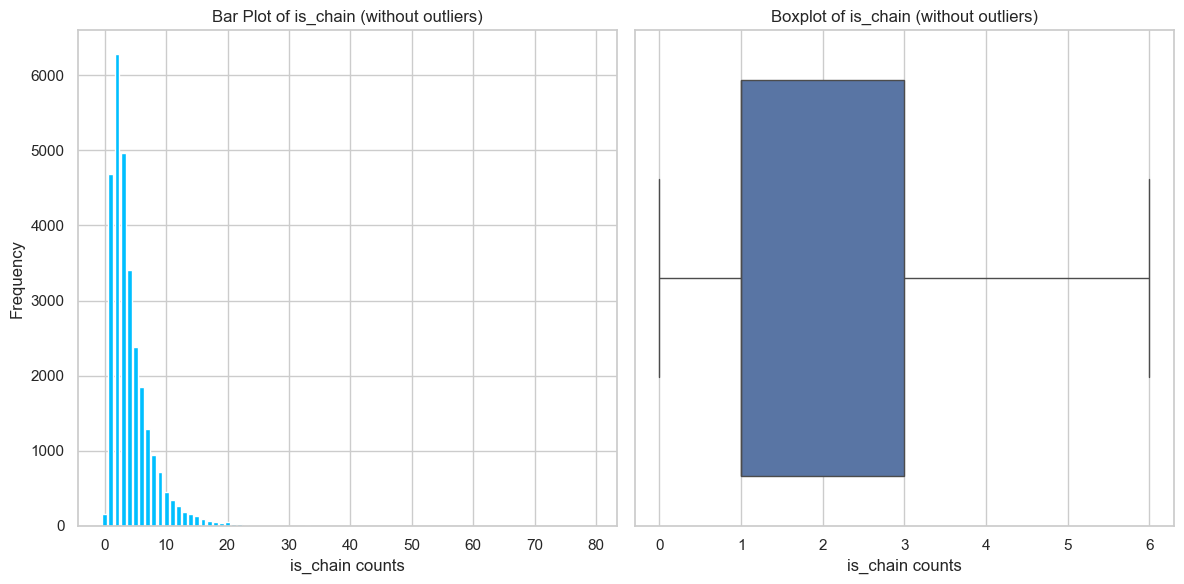

In [535]:
is_chain = df_is_chain['product_count'].value_counts().sort_index()
# First subplot: Bar Plot of is_chain
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
plt.bar(is_chain.index, is_chain.values, color='deepskyblue') # Create a bar plot of the is_chain counts
plt.title('Bar Plot of is_chain (without outliers)') # Set the title of the bar plot
plt.xlabel('is_chain counts',fontsize=12) # Label the x-axis
plt.ylabel('Frequency',fontsize=12)  # Label the y-axis

# Second subplot: Boxplot of vendor_count
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the bar plot
sns.boxplot(x=df_is_chain['is_chain']) # Plot the boxplot for the vendor_count
plt.title('Boxplot of is_chain (without outliers)')  # Set the title of the boxplot
plt.xlabel('is_chain counts', fontsize=12) # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

**Observations**

*   The variable shows a positive skew, with a concentration of lower values and a longer tail extending toward higher values.
*   A significant number of outliers skew toward higher counts. These are not errors but refer to costumer that made a higher number of orders
*   No missing values

# Let's check for inconsistencies

Let`s create a copy of our original data frame to not modify our original dataframe

In [539]:
df_inc=df.copy()

One important aspect to check in our dataframe is the presence of inconsistencies between variables, as these can lead to misleading information and, ultimately, cause our clustering model to produce inaccurate groupings

## Check if the sum of the number of orders placed on each day of the week is equal of the number of orders placed on each hour of the day

We will ignore HR_0

In [543]:
# Calculate the total sum of orders for each hour from HR_1 to HR_23 and store it in a new column 'sum_HR'
df_inc['sum_HR']=df_inc['HR_1']+df_inc['HR_2']+df_inc['HR_3']+df_inc['HR_4']+df_inc['HR_5']+df_inc['HR_6']+df_inc['HR_7']+df_inc['HR_8']+df_inc['HR_9']+df_inc['HR_10']+df_inc['HR_11']+df_inc['HR_12']+df_inc['HR_13']+df_inc['HR_14']+df_inc['HR_15']+df_inc['HR_16']+df_inc['HR_17']+df_inc['HR_18']+df_inc['HR_19']+df_inc['HR_20']+df_inc['HR_21']+df_inc['HR_22']+df_inc['HR_23']
# Calculate the total sum of orders for each day of the week from DOW_0 to DOW_6 and store it in a new column 'sum_DOW'
df_inc['sum_DOW']=df_inc['DOW_0']+df_inc['DOW_1']+df_inc['DOW_2']+df_inc['DOW_3']+df_inc['DOW_4']+df_inc['DOW_5']+df_inc['DOW_6']
# Create a new column 'inc_0' to indicate whether the sum of hourly orders differs from the sum of daily orders
df_inc['inc_0']=(df_inc['sum_HR']!=df_inc['sum_DOW'])
df_inc['inc_0'].value_counts()

inc_0
False    30711
True      1164
Name: count, dtype: int64

In [544]:
df_inc[df_inc['inc_0']==True][['sum_HR','sum_DOW']]

,sum_HR,sum_DOW
customer_id,,
ae38da6386,1,2
a21a839c77,3,4
9237d23413,3,4
8c6ffd7357,2,3
67c6c9f9c4,2,3
...,...,...
37b72b449d,0,1
ac382ddfd1,1,2
96f1fc25e3,1,2


Conclusion:

There are 1164 rows with different sums of orders in the hours and days of the week

In [546]:
#Lets exclude inconsistent rows to not disturb further inconsistencies analisys
df_inc=df_inc[df_inc['inc_0']==False]

## vendor_count equals to zero

In [548]:
# Create a new column 'inc_1' to indicate if vendor_count column is euqal to zero
df_inc['inc_1']=(df_inc['vendor_count']==0)
df_inc['inc_1'].value_counts()

inc_1
False    30573
True       138
Name: count, dtype: int64

Conclusion:

There are 138 rows with vendor_count equals to zero

## product_count equals to zero

In [551]:
# Create a new column 'inc_2' to indicate if product_count column is euqal to zero
df_inc['inc_2']=(df_inc['product_count']==0)
df_inc['inc_2'].value_counts()

inc_2
False    30555
True       156
Name: count, dtype: int64

In [552]:
df_inc[(df_inc['inc_2']==True) & (df_inc['inc_1']==True)]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_19,HR_20,HR_21,HR_22,HR_23,sum_HR,sum_DOW,inc_0,inc_1,inc_2
customer_id,,,,,,,,,,,,,,,,,,,,,
4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,0,0,0,False,True,True
c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,...,0,0,0,0,0,0,0,False,True,True
f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,0,0,0,False,True,True
c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,...,0,0,0,0,0,0,0,False,True,True
1b7c34738e,8670,24.0,0,0,0,3.0,3,no_promotion_used,CASH,0.0,...,0,0,0,0,0,0,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177ede2420,8670,30.0,0,0,1,86.0,86,no_promotion_used,DIGI,0.0,...,0,0,0,0,0,0,0,False,True,True
0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,...,0,0,0,0,0,0,0,False,True,True
0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,...,0,0,0,0,0,0,0,False,True,True


Conclusion:

There are 156 rows where the product_count is zero; of these, 138 also have a vendor_count of zero.

## Total number of orders equals to zero

In [555]:
# Create a new column 'inc_3' to indicate if total number of orders is equal to zero
df_inc['inc_3']=(df_inc['sum_HR']==0)
df_inc['inc_3'].value_counts()

inc_3
False    30573
True       138
Name: count, dtype: int64

In [556]:
df_inc[(df_inc['inc_2']==True) & (df_inc['inc_1']==True) & (df_inc['inc_3']==True)]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_20,HR_21,HR_22,HR_23,sum_HR,sum_DOW,inc_0,inc_1,inc_2,inc_3
customer_id,,,,,,,,,,,,,,,,,,,,,
4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,0,0,False,True,True,True
c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,...,0,0,0,0,0,0,False,True,True,True
f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,0,0,False,True,True,True
c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,...,0,0,0,0,0,0,False,True,True,True
1b7c34738e,8670,24.0,0,0,0,3.0,3,no_promotion_used,CASH,0.0,...,0,0,0,0,0,0,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177ede2420,8670,30.0,0,0,1,86.0,86,no_promotion_used,DIGI,0.0,...,0,0,0,0,0,0,False,True,True,True
0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,...,0,0,0,0,0,0,False,True,True,True
0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,...,0,0,0,0,0,0,False,True,True,True


Conclusion:

There are 138 rows where the total number of orders is zero, and in each of these, both product_count and vendor_count are also zero.

## Money spent by the costumer is 0

In [559]:
#calculate the money spent by  a costumer suming the money spent in each type of cuisine
df_inc['money_spent']=df_inc[cuisine_columns].sum(axis=1)
# Create a new column 'inc_4' to indicate if the money spent is equal to zero
df_inc['inc_4']=(df_inc['money_spent']==0)
df_inc['inc_4'].value_counts()

inc_4
False    30573
True       138
Name: count, dtype: int64

In [560]:
df_inc[(df_inc['inc_4']==True) & (df_inc['inc_3']==True) & (df_inc['inc_2']==True) & (df_inc['inc_1']==True)]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_22,HR_23,sum_HR,sum_DOW,inc_0,inc_1,inc_2,inc_3,money_spent,inc_4
customer_id,,,,,,,,,,,,,,,,,,,,,
4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,False,True,True,True,0.0,True
c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,0.0,...,0,0,0,0,False,True,True,True,0.0,True
f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,0.0,...,0,0,0,0,False,True,True,True,0.0,True
c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,0.0,...,0,0,0,0,False,True,True,True,0.0,True
1b7c34738e,8670,24.0,0,0,0,3.0,3,no_promotion_used,CASH,0.0,...,0,0,0,0,False,True,True,True,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177ede2420,8670,30.0,0,0,1,86.0,86,no_promotion_used,DIGI,0.0,...,0,0,0,0,False,True,True,True,0.0,True
0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,0.0,...,0,0,0,0,False,True,True,True,0.0,True
0e60632fe2,8670,23.0,0,0,0,89.0,89,DISCOUNT,CARD,0.0,...,0,0,0,0,False,True,True,True,0.0,True


Conclusion:

There are 138 rows where the money spent is zero, and in each of these, product_count, vendor_count and total number of orders are also zero.

In [562]:
#Lets exclude inconsistent rows to not disturb further inconsistencies analisys
df_inc=df_inc[df_inc['inc_2']==False]


## The total number of orders cannot be less than the vendor_count

In [564]:
# Create a new column 'inc_5' to indicate if vendor_count value is greater than the total number of orders
df['inc_5']=df_inc['sum_HR']<df_inc['vendor_count']
df['inc_5'].value_counts()

inc_5
False    30555
Name: count, dtype: int64

## product count has to be greater than the total number of orders

In [566]:
# Create a new column 'inc_6' to indicate if the total number of orders is greater than the value in product_count
df_inc['inc_6']=df_inc['product_count']<df_inc['sum_HR']
df_inc['inc_6'].value_counts()

inc_6
False    30555
Name: count, dtype: int64

## is_chain cannot be greater then the total of orders

In [568]:
# Create a new column 'inc_7' to indicate if the total number of is_chain orders is greater than the total number of orders
df_inc['inc_7']=df_inc['is_chain']>df_inc['sum_HR']
df_inc['inc_7'].value_counts()

inc_7
False    30555
Name: count, dtype: int64

## last_order cannot be first then first_order

In [570]:
# Create a new column 'inc_8' to indicate if last order comes than first_order
df_inc['inc_8']=df_inc['last_order']<df_inc['first_order']
df_inc['inc_8'].value_counts()

inc_8
False    30555
Name: count, dtype: int64

# Creation of new variables

## Creation of the variable costumer_time

Customer_time is a variable that represents the duration of each customer's interaction with the delivery service

In [574]:
# Calculate the time difference between 'last_order' and 'first_order'
df['costumer_time']=df['last_order']-df['first_order']

Let's examine the key statistics for this variable:

In [576]:
df['costumer_time'].describe()

count    31769.000000
mean        35.414901
std         29.415668
min          0.000000
25%          3.000000
50%         34.000000
75%         62.000000
max         90.000000
Name: costumer_time, dtype: float64

In [577]:
print('The costumer_time variable has ' + str(df['costumer_time'].isna().mean()*100) + '% of missing values')

The costumer_time variable has 0.3325490196078431% of missing values


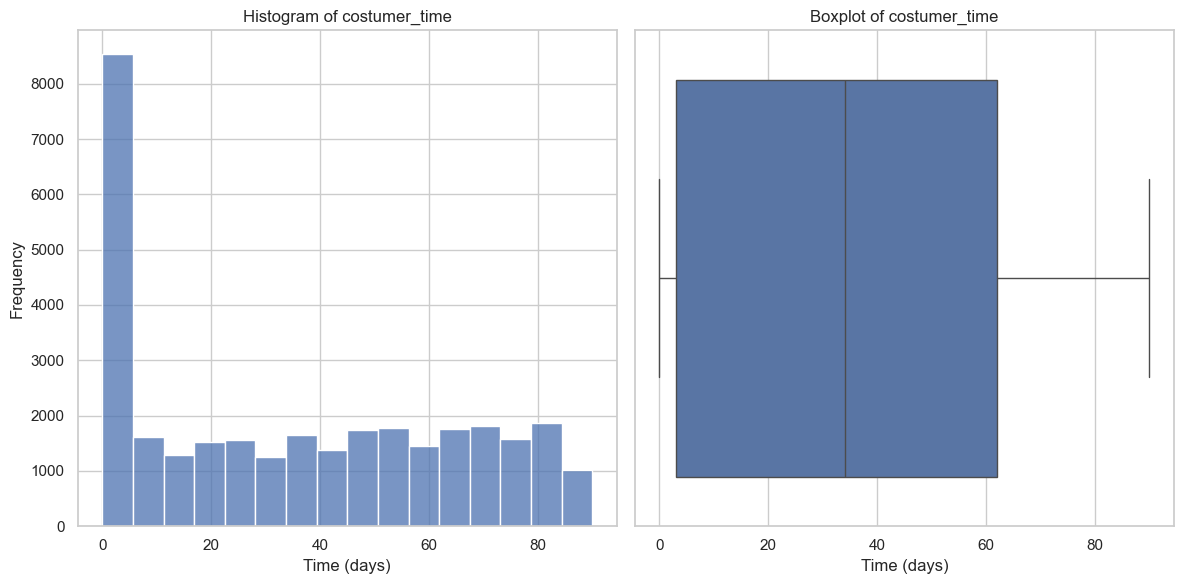

In [578]:
# First subplot: Histogram of costumer_time
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
sns.histplot(df['costumer_time'], bins=16, kde=False)  # Plot the histogram of costumer_time with 16 bins (intervals)
plt.title('Histogram of costumer_time')  # Set the title of the histogram
plt.xlabel('Time (days)', fontsize=12)  # Label for the x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for the y-axis indicating frequency

# Second subplot: Boxplot of costumer_time
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the histogram
sns.boxplot(x=df['costumer_time'])  # Plot the boxplot for the costumer_time column
plt.title('Boxplot of costumer_time')  # Set the title of the boxplot
plt.xlabel('Time (days)', fontsize=12)  # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

We can see in the histogram that there are many clients who have a customer_time of zero, indicating that they are not repeat clients.

To enhance visualization, we will omit them

Text(0, 0.5, 'Frequency')

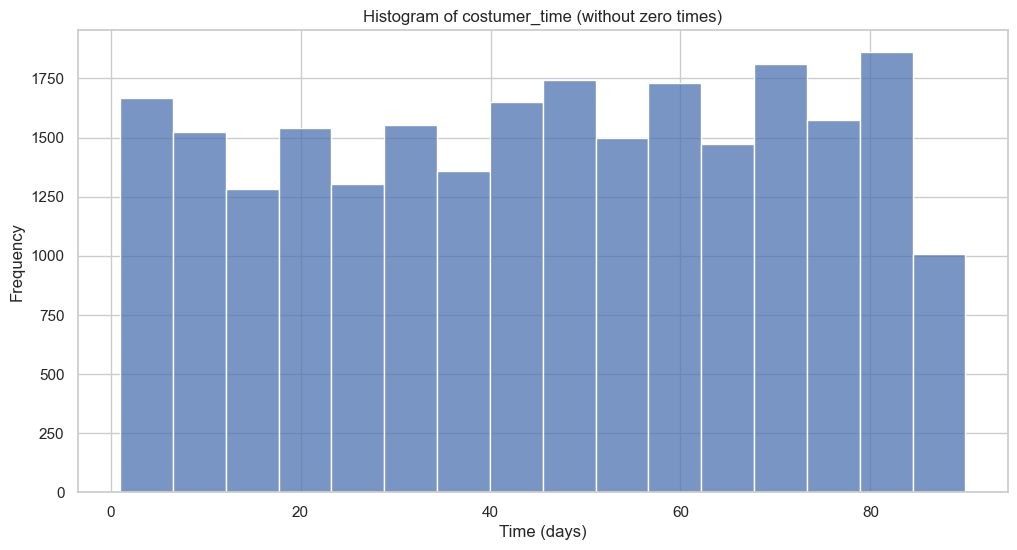

In [581]:
# First subplot: Histogram of costumer_time
plt.figure(figsize=(12, 6))  # Set the figure size
sns.histplot(df[df['costumer_time']!=0]['costumer_time'], bins=16)  # Plot the histogram of costumer_time with 16 bins (intervals)
plt.title('Histogram of costumer_time (without zero times)')  # Set the title of the histogram
plt.xlabel('Time (days)', fontsize=12)  # Label for the x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for the y-axis indicating frequency

**Observations**

*  This variable has 0.33% of variables due to the first_order missing values
*  This variable has a high number of zero values, indicating a large proportion of one-time customers. It would be valuable to group repeat customers separately from non-repeat customers to tailor marketing strategies aimed at increasing customer loyalty to the service and encouraging repeat purchases.

## Creation of the variable order_count

order_count represent the total number of orders of each costumer

In [585]:
df['order_count']=df['DOW_0']+df['DOW_1']+df['DOW_2']+df['DOW_3']+df['DOW_4']+df['DOW_5']+df['DOW_6']

Let's examine the key statistics for this variable:

In [587]:
df['order_count'].describe()

count    31875.000000
mean         4.369035
std          5.084780
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         94.000000
Name: order_count, dtype: float64

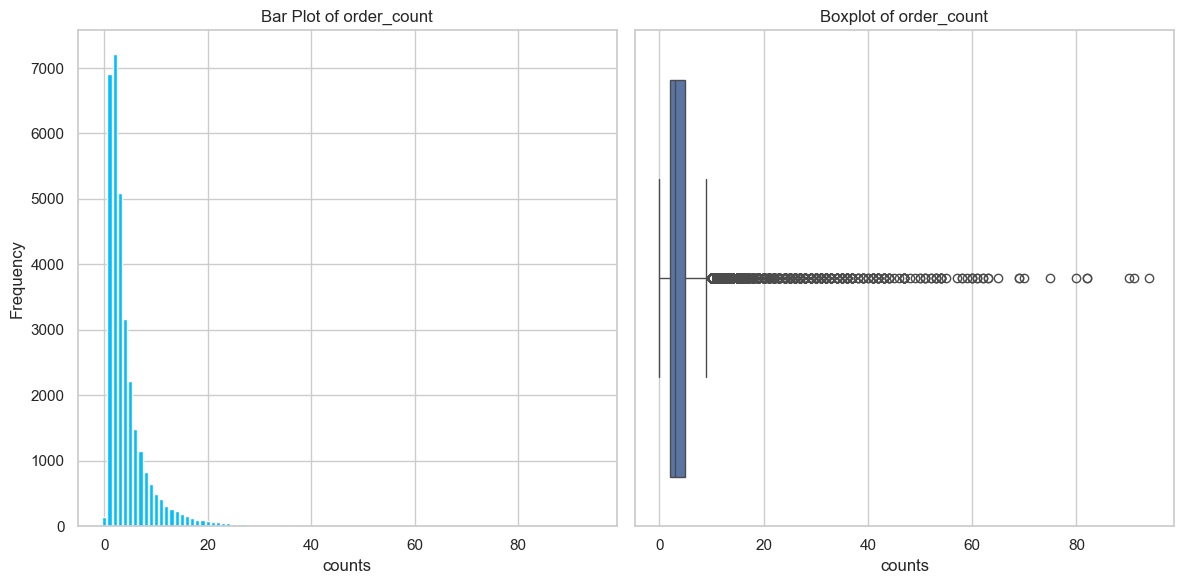

In [588]:
order_count = df['order_count'].value_counts().sort_index()
# First subplot: Bar Plot of order_count
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
plt.bar(order_count.index, order_count.values, color='deepskyblue') # Create a bar plot of the order_count counts
plt.title('Bar Plot of order_count') # Set the title of the bar plot
plt.xlabel('counts',fontsize=12) # Label the x-axis
plt.ylabel('Frequency',fontsize=12)  # Label the y-axis

# Second subplot: Boxplot of order_count
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the bar plot
sns.boxplot(x=df['order_count']) # Plot the boxplot for the order_count
plt.title('Boxplot of order_count')  # Set the title of the boxplot
plt.xlabel('counts', fontsize=12) # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

Examining the histogram and boxplot reveals an asymmetric order_count distribution, likely influenced by outliers, as shown in the boxplot. These outliers are unlikely to be data errors; they probably represent clients who simply decided to make more orders.

We will obtain this outliers represented in the boxplot using the inter quartis technique

In [591]:
detect_outliers_in_column(df,'order_count')['order_count'].sort_values()

customer_id
de4cafca2f    10
47de1d7c7f    10
d68875653c    10
29715cace9    10
dbeaa5eb31    10
              ..
89b7866691    82
1846111110    82
910e70571d    90
d798652ec0    91
92ced2dcb9    94
Name: order_count, Length: 3027, dtype: int64

To get better visualisations, we will exclude the outliers for now:

In [593]:
# Create a copy of the original DataFrame to avoid modifying the original dataframe
df_order_count=df.copy()
# Filter the DataFrame to exclude outliers (counts less than 7)
df_order_count=df_order_count[df_order_count['order_count']<10]

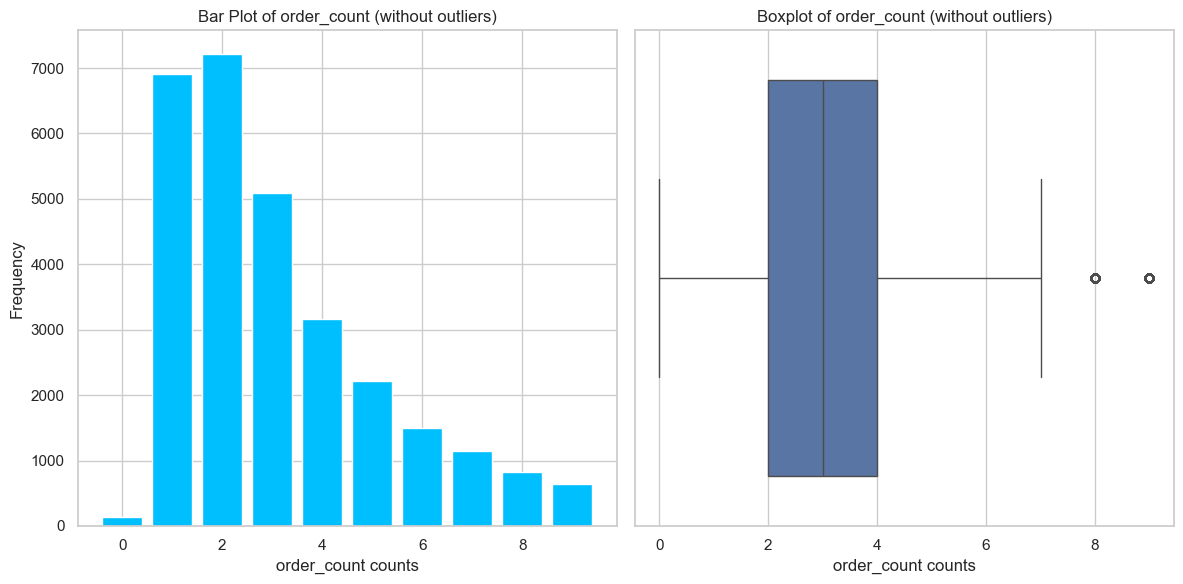

In [594]:
order_count = df_order_count['order_count'].value_counts().sort_index()
# First subplot: Bar Plot of order_count
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
plt.bar(order_count.index, order_count.values, color='deepskyblue') # Create a bar plot of the order_count counts
plt.title('Bar Plot of order_count (without outliers)') # Set the title of the bar plot
plt.xlabel('order_count counts',fontsize=12) # Label the x-axis
plt.ylabel('Frequency',fontsize=12)  # Label the y-axis

# Second subplot: Boxplot of order_count
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the bar plot
sns.boxplot(x=df_order_count['order_count']) # Plot the boxplot for the order_count
plt.title('Boxplot of order_count (without outliers)')  # Set the title of the boxplot
plt.xlabel('order_count counts', fontsize=12) # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

**Observations**

*   The variable shows a positive skew, with a concentration of lower values and a longer tail extending toward higher values.
*   A significant number of outliers skew toward higher counts. These are not errors but refer to costumers that made a higher number of orders
*   No missing values

## Creation of the variable diversity_cuisine

diversity_cuisine is a variable that represents a measure of how many different types of cuisines a customer has ordered, where a value of 0 means the customer has not ordered any type of cuisine, and higher values indicate a broader range of types of cuisines.

In [598]:
cuisine_columns = [col for col in df.columns if col.startswith("CUI_")]
df['diversity_cuisine'] = (df[cuisine_columns] > 0).sum(axis=1)
df['diversity_cuisine'] = df['diversity_cuisine'].replace(0, np.nan)

Let's examine the key statistics for this variable:

In [600]:
df['diversity_cuisine'].describe()

count    31737.000000
mean         2.285156
std          1.480498
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: diversity_cuisine, dtype: float64

In [601]:
print('The diversity_cuisine variable has ' + str(df['diversity_cuisine'].isna().mean()*100) + '% of missing values')

The diversity_cuisine variable has 0.4329411764705882% of missing values


In [602]:
df['diversity_cuisine'].describe()

count    31737.000000
mean         2.285156
std          1.480498
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: diversity_cuisine, dtype: float64

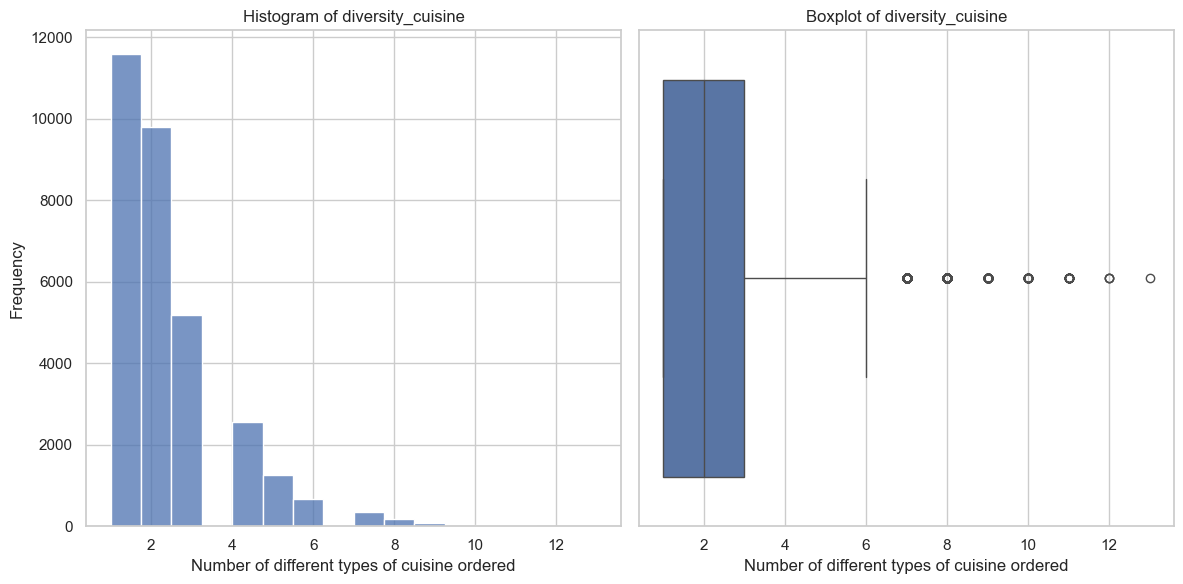

In [603]:
# First subplot: Histogram of diversity_cuisine
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
sns.histplot(df['diversity_cuisine'], bins=16, kde=False)  # Plot the histogram of diversity_cuisine with 16 bins (intervals)
plt.title('Histogram of diversity_cuisine')  # Set the title of the histogram
plt.xlabel('Number of different types of cuisine ordered', fontsize=12)  # Label for the x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for the y-axis indicating frequency

# Second subplot: Boxplot of diversity_cuisine
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the histogram
sns.boxplot(x=df['diversity_cuisine'])  # Plot the boxplot for the diversity_cuisine column
plt.title('Boxplot of diversity_cuisine')  # Set the title of the boxplot
plt.xlabel('Number of different types of cuisine ordered', fontsize=12)  # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

**Observations**
*   The missing values of this variable are from rows with total money spent equal to zero

## Creation of the variable intensivity_of_activity

intensivity_of_activity represents the average time interval between two orders of a costumer

In [607]:
df['intensity_of_activity'] = df['costumer_time'] / df['order_count']

Let's examine the key statistics for this variable:

In [609]:
df['intensity_of_activity'].describe()

count    31631.000000
mean         8.505465
std          7.888332
min          0.000000
25%          1.500000
50%          7.181818
75%         12.750000
max         44.500000
Name: intensity_of_activity, dtype: float64

In [610]:
print('The intensity_of_activity variable has ' + str(df['intensity_of_activity'].isna().mean()*100) + '% of missing values')

The intensity_of_activity variable has 0.7654901960784314% of missing values


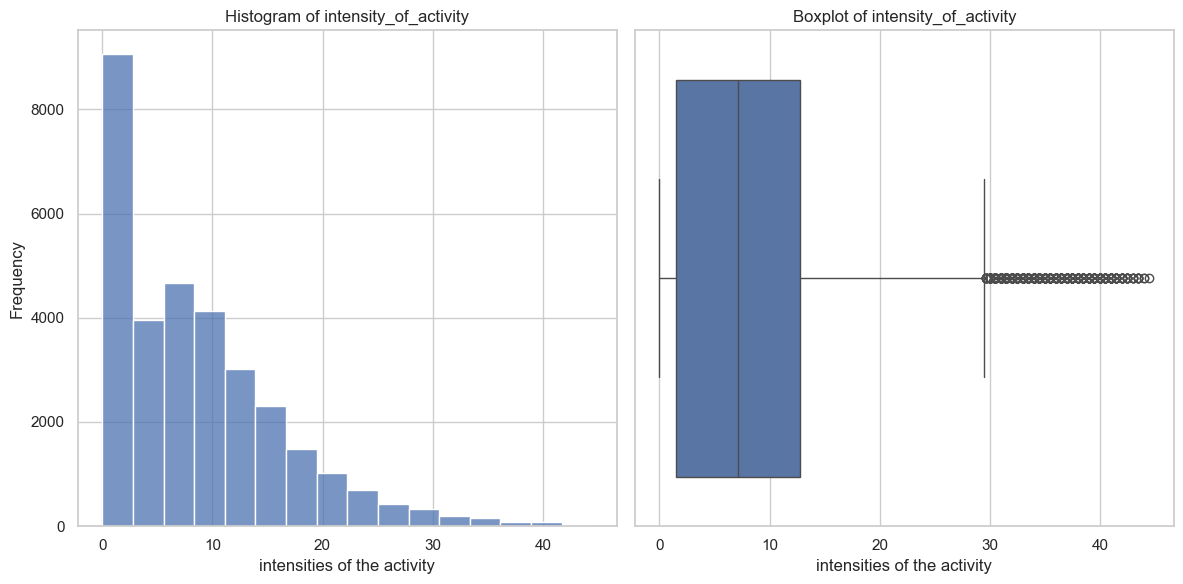

In [611]:
# First subplot: Histogram of intensity_of_activity
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
sns.histplot(df['intensity_of_activity'], bins=16, kde=False)  # Plot the histogram of intensity_of_activity with 16 bins (intervals)
plt.title('Histogram of intensity_of_activity')  # Set the title of the histogram
plt.xlabel('intensities of the activity', fontsize=12)  # Label for the x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for the y-axis indicating frequency

# Second subplot: Boxplot of intensity_of_activity
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the histogram
sns.boxplot(x=df['intensity_of_activity'])  # Plot the boxplot for the intensity_of_activity column
plt.title('Boxplot of intensity_of_activity')  # Set the title of the boxplot
plt.xlabel('intensities of the activity', fontsize=12)  # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

**Observations**


*   The variable shows a positive skew, with a concentration of lower values and a longer tail extending toward higher values.
*   A significant number of outliers skew toward higher counts. These are not errors but refer to costumers that made a higher number of orders in a shorter time
*   There is a big number of zeros due to single buyers
*   The missing values are from rows with order count equal to zero and with missing value in first_order








## Creation of the variable Total_Spent

Total_Spent represents the total amount of money spent by each customer

In [615]:
df['Total_Spent']=df['CUI_Asian']+df['CUI_American']+df['CUI_Beverages']+df['CUI_Cafe']+df['CUI_Chicken Dishes']+df['CUI_Chinese']+df['CUI_Desserts']+df['CUI_Healthy']+df['CUI_Indian']+df['CUI_Italian']+df['CUI_Japanese']+df['CUI_Noodle Dishes']+df['CUI_OTHER']+df['CUI_Street Food / Snacks']

Let's examine the key statistics for this variable:

In [617]:
df['Total_Spent'].describe()

count    31875.000000
mean        37.453817
std         45.768390
min          0.000000
25%         12.430000
50%         23.860000
75%         43.975000
max       1308.690000
Name: Total_Spent, dtype: float64

In [618]:
print('The Total_Spent variable has ' + str(df['Total_Spent'].isna().mean()*100) + '% of missing values')

The Total_Spent variable has 0.0% of missing values


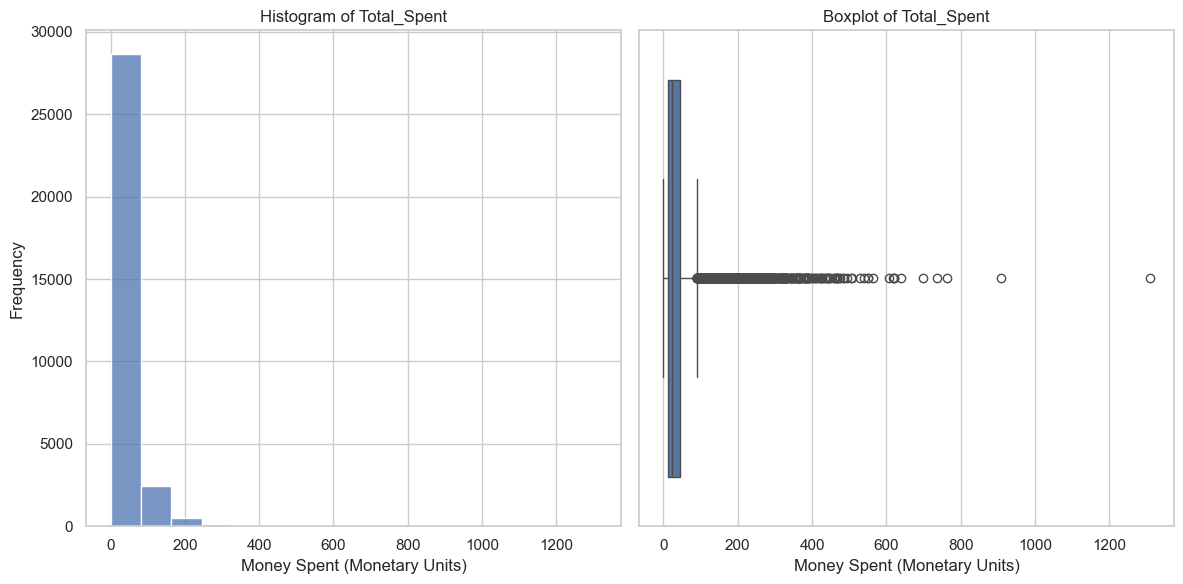

In [619]:
# First subplot: Histogram of Total_Spent
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
sns.histplot(df['Total_Spent'], bins=16, kde=False)  # Plot the histogram of Total_Spent with 16 bins (intervals)
plt.title('Histogram of Total_Spent')  # Set the title of the histogram
plt.xlabel('Money Spent (Monetary Units)', fontsize=12)  # Label for the x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for the y-axis indicating frequency

# Second subplot: Boxplot of Total_Spent
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the histogram
sns.boxplot(x=df['Total_Spent'])  # Plot the boxplot for the Total_Spent column
plt.title('Boxplot of Total_Spent')  # Set the title of the boxplot
plt.xlabel('Money Spent (Monetary Units)', fontsize=12)  # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

Examining the histogram and boxplot reveals an asymmetric vendor_count distribution, likely influenced by outliers, as shown in the boxplot. These outliers are unlikely to be data errors; they probably represent clients who simply decided to spend more money in their purchases.

We will obtain this outliers represented in the boxplot using the inter quartis technique

In [622]:
detect_outliers_in_column(df,'Total_Spent')['Total_Spent'].sort_values()

customer_id
47be9396a6      91.30
d6dd517d46      91.32
b787fd1f72      91.37
24a90256b9      91.37
d385902935      91.38
               ...   
9b7035b6a3     698.48
f4b9bc0d01     736.15
8d65421423     763.92
249ba584d3     907.86
92ced2dcb9    1308.69
Name: Total_Spent, Length: 2640, dtype: float64

In [623]:
# Create a copy of the original DataFrame to avoid modifying the original dataframe
df_Total_Spent=df.copy()
# Filter the DataFrame to exclude outliers (total spent less than 91.30)
df_Total_Spent=df_Total_Spent[df_Total_Spent['Total_Spent']<91.30]

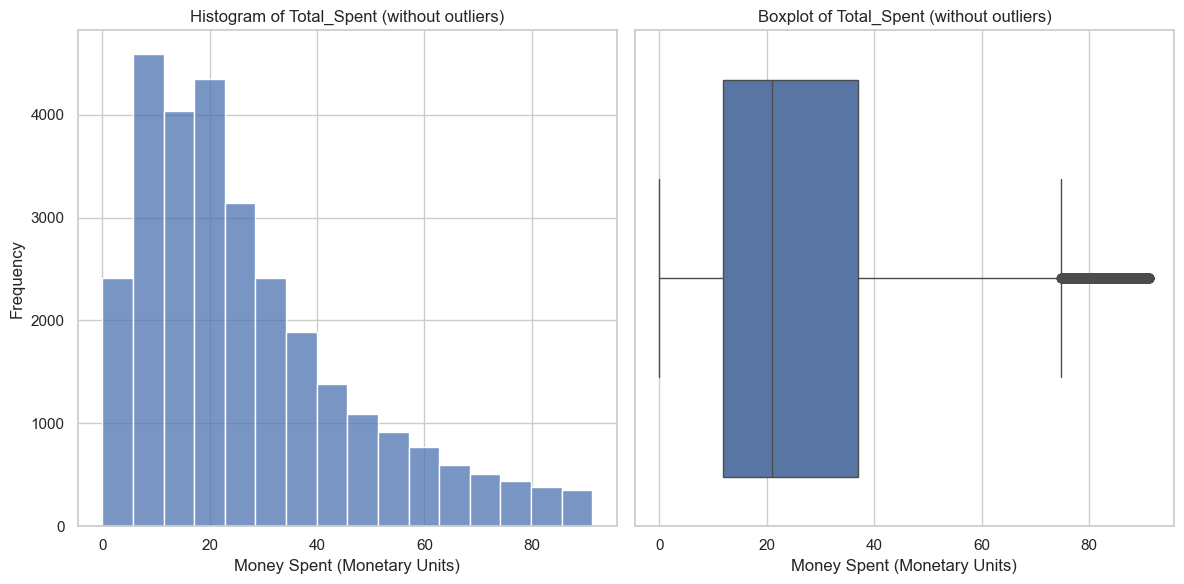

In [624]:
# First subplot: Histogram of Total_Spent
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
sns.histplot(df_Total_Spent['Total_Spent'], bins=16, kde=False)  # Plot the histogram of Total_Spent with 16 bins (intervals)
plt.title('Histogram of Total_Spent (without outliers)')  # Set the title of the histogram
plt.xlabel('Money Spent (Monetary Units)', fontsize=12)  # Label for the x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for the y-axis indicating frequency

# Second subplot: Boxplot of Total_Spent
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the histogram
sns.boxplot(x=df_Total_Spent['Total_Spent'])  # Plot the boxplot for the Total_Spent column
plt.title('Boxplot of Total_Spent (without outliers)')  # Set the title of the boxplot
plt.xlabel('Money Spent (Monetary Units)', fontsize=12)  # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

**Observations**


*   The variable shows a positive skew, with a concentration of lower values and a longer tail extending toward higher values.
*   A significant number of extreme outliers, these are not errors but refer to costumers that spent an extreme amout of money
*   No missing values

## Creation of the variable Customer_loyalty

Customer_loyalty represents how diverse a customer’s ordering behavior is.

A high value may indicate a willingness to try new vendors.

A low value may suggest a strong preference or loyalty for one or more vendors

In [628]:
df['Customer_loyalty'] = df['vendor_count'] / df['order_count']

Let's examine the key statistics for this variable:

In [630]:
df['Customer_loyalty'].describe()

count    31737.000000
mean         0.838196
std          0.229567
min          0.026667
25%          0.666667
50%          1.000000
75%          1.000000
max          1.000000
Name: Customer_loyalty, dtype: float64

In [631]:
print('The Customer_loyalty variable has ' + str(df['Customer_loyalty'].isna().mean()*100) + '% of missing values')

The Customer_loyalty variable has 0.4329411764705882% of missing values


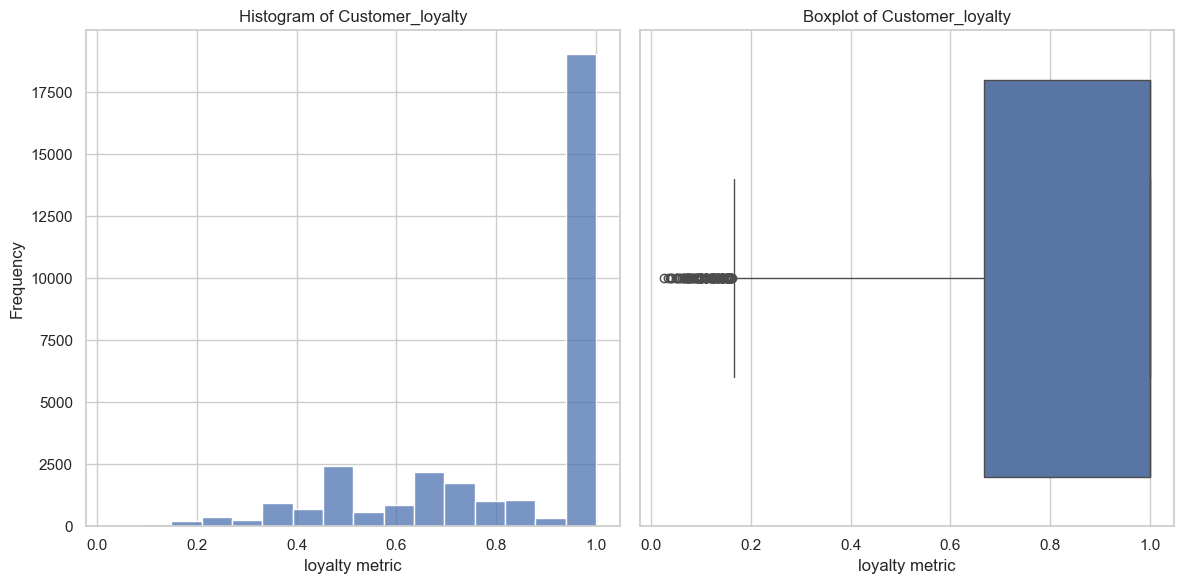

In [632]:
# First subplot: Histogram of Customer_loyalty
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
sns.histplot(df['Customer_loyalty'], bins=16, kde=False)  # Plot the histogram of Customer_loyalty with 16 bins (intervals)
plt.title('Histogram of Customer_loyalty')  # Set the title of the histogram
plt.xlabel('loyalty metric', fontsize=12)  # Label for the x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for the y-axis indicating frequency

# Second subplot: Boxplot of Customer_loyalty
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the histogram
sns.boxplot(x=df['Customer_loyalty'])  # Plot the boxplot for the Customer_loyalty column
plt.title('Boxplot of Customer_loyalty')  # Set the title of the boxplot
plt.xlabel('loyalty metric', fontsize=12)  # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

## Creation of the variable age_category

age_category categorizes individuals into distinct age groups

In [635]:
# Define the bins for categorizing customer ages
bins = [15, 20, 30, 50,100]
# Define the corresponding labels for each age category
labels = ['Teen', 'Young-Adult', 'Adult', 'Senior']
# Use pd.cut to create a new column 'age_category' based on the 'customer_age' column
# This assigns each customer's age to the defined categories based on the specified bins
df['age_category'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=True)

Let's examine the key statistics for this variable:

In [637]:
df['age_category'].describe()

count           31128
unique              4
top       Young-Adult
freq            19636
Name: age_category, dtype: object

In [638]:
print('The age_category variable has ' + str(df['age_category'].isna().mean()*100) + '% of missing values')

The age_category variable has 2.3435294117647056% of missing values


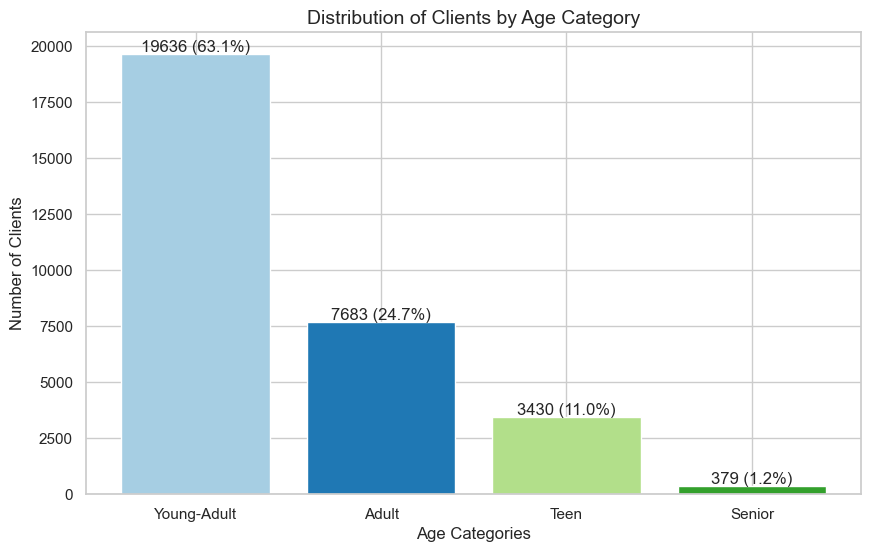

In [639]:
# Calculate the counts of each age category, excluding NaN values
region_counts = df['age_category'].value_counts(dropna=True)
# Generate a color map for the bars using the Paired colormap
colors = plt.cm.Paired(range(len(region_counts)))
# Create a figure with a specified size for the bar plot
plt.figure(figsize=(10, 6))
# Create a bar plot using the age category counts and corresponding colors
plt.bar(region_counts.index, region_counts.values, color=colors)
# Label the x-axis as 'Age Categories'
plt.xlabel('Age Categories', fontsize=12)
# Label the y-axis as 'Number of Clients'
plt.ylabel('Number of Clients', fontsize=12)
# Set the title of the bar plot to 'Distribution of Clients by Age Category'
plt.title('Distribution of Clients by Age Category', fontsize=14)
# Add text annotations above each bar to display the count and percentage of clients
for i, count in enumerate(region_counts.values):
    plt.text(i, count + 100, f'{count} ({100 * count / sum(region_counts):.1f}%)', ha='center')
# Display the plot
plt.show()


## Creation of the variable product_intensity

product_intensity represents the average number of products per order of a costumer

In [642]:
df['product_intensity'] = df['product_count'] / df['order_count']

Let's examine the key statistics for this variable:

In [644]:
df['product_intensity'].describe()

count    31737.000000
mean         1.298840
std          0.418388
min          0.000000
25%          1.000000
50%          1.166667
75%          1.500000
max          6.000000
Name: product_intensity, dtype: float64

In [645]:
print('The product_intensity variable has ' + str(df['product_intensity'].isna().mean()*100) + '% of missing values')

The product_intensity variable has 0.4329411764705882% of missing values


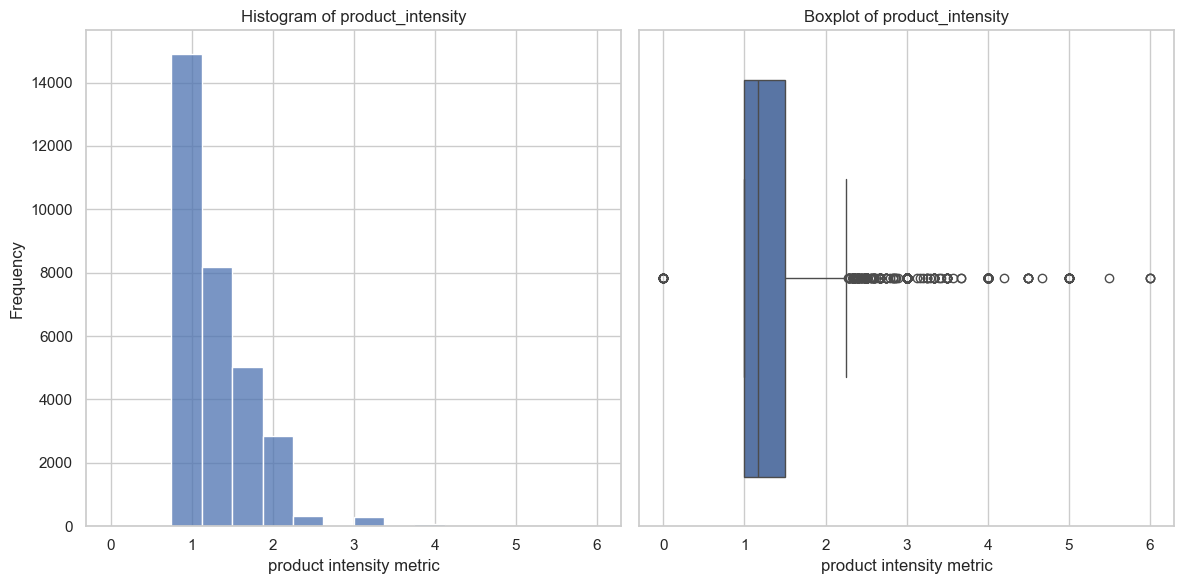

In [646]:
# First subplot: Histogram of product_intensity
plt.figure(figsize=(12, 6))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot in a grid of 1 row and 2 columns
sns.histplot(df['product_intensity'], bins=16, kde=False)  # Plot the histogram of product_intensity with 16 bins (intervals)
plt.title('Histogram of product_intensity')  # Set the title of the histogram
plt.xlabel('product intensity metric', fontsize=12)  # Label for the x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for the y-axis indicating frequency

# Second subplot: Boxplot of product_intensity
plt.subplot(1, 2, 2)  # Create the second subplot in the same row, next to the histogram
sns.boxplot(x=df['product_intensity'])  # Plot the boxplot for the product_intensity column
plt.title('Boxplot of product_intensity')  # Set the title of the boxplot
plt.xlabel('product intensity metric', fontsize=12)  # Label for the x-axis

# Layout adjustment and display
plt.tight_layout()  # Automatically adjust subplots to fit into the figure area without overlapping
plt.show()  # Display the plots

**Observations**

*   The variable shows a positive skew, with a concentration of lower values and a longer tail extending toward higher values.
*   A significant number of outliers skew toward higher counts. These are not errors but refer to costumers that made a bigger purchase of products in a order
*   missing values from order count

# Relations between variables

## Relation between Total_Spent and payment_method

In theory, customers are more likely to pay by card for larger purchases due to convenience. To test this in our data, we will group customers into sets of 100 based on ascending order of money spent and then analyze the proportion of cash versus card payments within each group

C:\Users\rodri\AppData\Local\Temp\ipykernel_57812\122357885.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cash_proportion = df.groupby('group').apply(
C:\Users\rodri\AppData\Local\Temp\ipykernel_57812\122357885.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  card_proportion = df.groupby('group').apply(
C:\Users\rodri\AppData\Local\Temp\ipykernel_57812\122357885.py:14: DeprecationWarning: DataFram

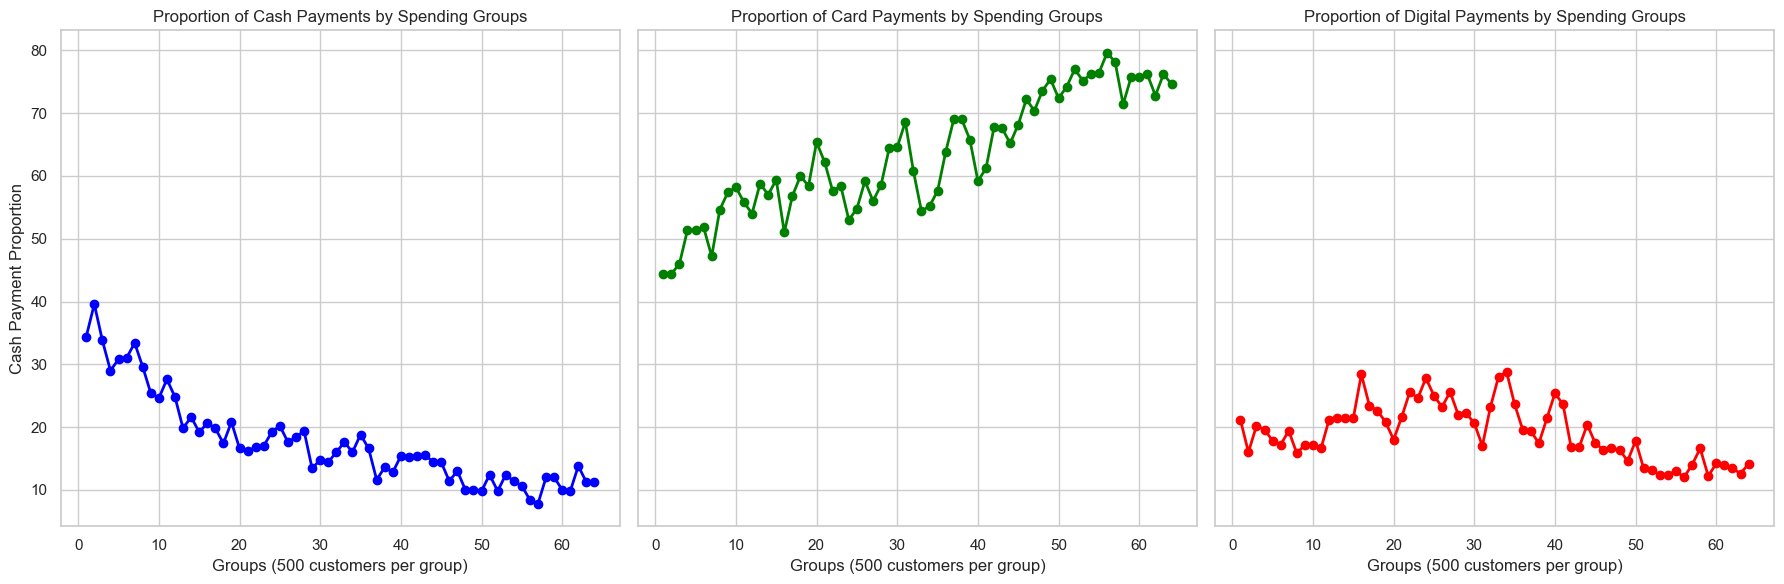

In [651]:
# Sort the DataFrame by 'Total_Spent' in ascending order and reset the index
df = df.sort_values(by='Total_Spent').reset_index(drop=True)
# Create a 'group' column to categorize customers into groups of 500
df['group'] = (df.index // 500) + 1
# Calculate the proportion of cash payments for each group
cash_proportion = df.groupby('group').apply(
    lambda x: (x['payment_method']== 'CASH').mean() * 100
).reset_index(name='cash_proportion')
# Calculate the proportion of card payments for each group
card_proportion = df.groupby('group').apply(
    lambda x: (x['payment_method'] == 'CARD').mean() * 100
).reset_index(name='card_proportion')
# Calculate the proportion of digital payments for each group
digital_proportion = df.groupby('group').apply(
    lambda x: (x['payment_method'] == 'DIGI').mean() * 100
).reset_index(name='DIGI_proportion')
# Create a figure with 3 subplots, sharing the y-axis
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
# Plot the proportion of cash payments
axes[0].plot(cash_proportion['group'], cash_proportion['cash_proportion'], marker='o', color='blue', linestyle='-', linewidth=2)
axes[0].set_title('Proportion of Cash Payments by Spending Groups')
axes[0].set_xlabel('Groups (500 customers per group)')
axes[0].set_ylabel('Cash Payment Proportion')
axes[0].grid(True)

# Plot the proportion of card payments
axes[1].plot(card_proportion['group'], card_proportion['card_proportion'], marker='o', color='green', linestyle='-', linewidth=2)
axes[1].set_title('Proportion of Card Payments by Spending Groups')
axes[1].set_xlabel('Groups (500 customers per group)')
axes[1].grid(True)

# Plot the proportion of digital payments
axes[2].plot(digital_proportion['group'], digital_proportion['DIGI_proportion'], marker='o', color='red', linestyle='-', linewidth=2)
axes[2].set_title('Proportion of Digital Payments by Spending Groups')
axes[2].set_xlabel('Groups (500 customers per group)')
axes[2].grid(True)

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()

## Relation between age and Total_Spent

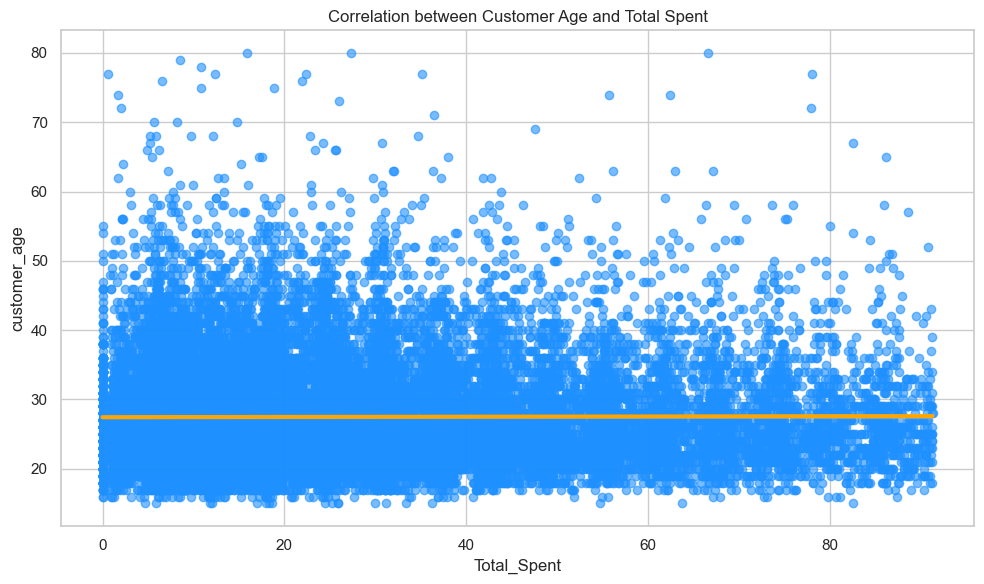

In [653]:
plt.figure(figsize=(10, 6)) # Set the figure size for the plot
# Scatter plot showing Total_Spent vs. customer_age
# Each point represents a customer's total spending and age
plt.scatter(df_Total_Spent['Total_Spent'], df_Total_Spent['customer_age'], color='dodgerblue', alpha=0.6)
plt.ylabel('Customer Age')# Label for the y-axis
plt.xlabel('Total Spended')# Label for the x-axis
plt.title('Correlation between Customer Age and Total Spent')# Setting the title of the plot
sns.regplot(data=df_Total_Spent, x='Total_Spent', y='customer_age', scatter=False, color='orange', line_kws={"linewidth":3})# Adding a regression line to show the correlation trend

plt.tight_layout()
plt.show()

## Relation between customer_age and payment_method

We are going to see if there are diferent proportions between ages and the type of payment

C:\Users\rodri\AppData\Local\Temp\ipykernel_57812\223902010.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_payment = df.groupby(['age_category', 'payment_method']).size().unstack(fill_value = 0) # Grouping data by age_category and payment_method, then calculating the size of each group


Text(0.5, 1.0, 'Proportion of Payment Methods by Age Class')

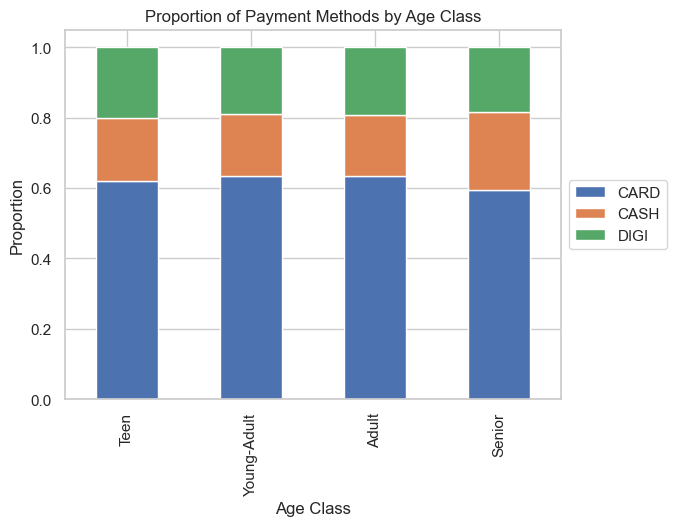

In [656]:
age_payment = df.groupby(['age_category', 'payment_method']).size().unstack(fill_value = 0) # Grouping data by age_category and payment_method, then calculating the size of each group
age_proportions = age_payment.div(age_payment.sum(axis = 1), axis = 0)# Calculating the proportion of each payment method within each age category

# Plotting the proportions as a stacked bar chart to show distribution by age class
age_proportions.plot(kind = 'bar', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Age Class')
plt.ylabel('Proportion')
plt.title('Proportion of Payment Methods by Age Class')

**Observations:**\
- It doesn't appear that the age affects the payment_method

## Relation between customer_age and CUI_types

C:\Users\rodri\AppData\Local\Temp\ipykernel_57812\3923323305.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cuisine_data = data.groupby('age_category')[cui_columns].sum()


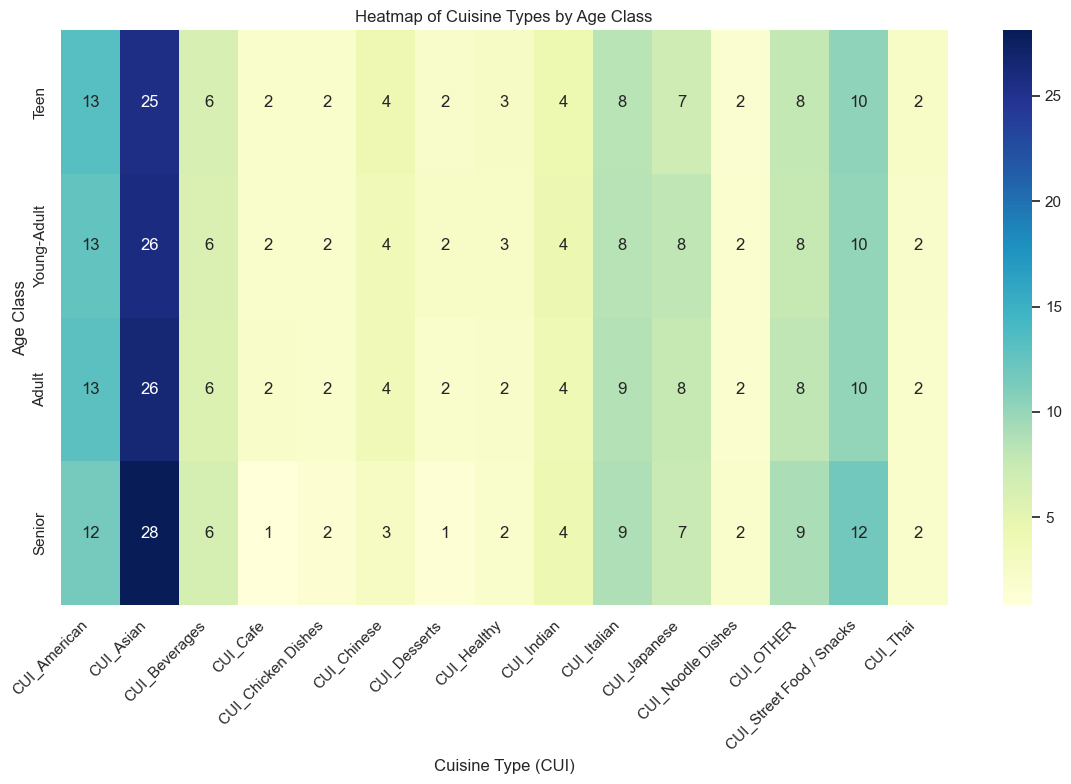

In [659]:
# Filter columns that start with 'CUI_' for cuisine types
cui_columns = [col for col in data.columns if col.startswith('CUI_')]
data[cui_columns] = data[cui_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Group data by age class and sum cuisine types
age_cuisine_data = data.groupby('age_category')[cui_columns].sum()

age_cuisine_data['Total Spent'] = age_cuisine_data.sum(axis=1)
age_cuisine_percentages = age_cuisine_data.div(age_cuisine_data['Total Spent'], axis=0) * 100
age_cuisine_percentages.drop(columns=['Total Spent'], inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(age_cuisine_percentages, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Heatmap of Cuisine Types by Age Class')
plt.xlabel('Cuisine Type (CUI)')
plt.ylabel('Age Class')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Observations:**\
-It appears that every age gap buys more from Asian Cuisine, and secondly American Cuisine\
-The ages between 60 and 80 also have an high proportion that buy Streed Food/Snacks\
-Ages between 60 and 70 third favorite Cuisine is Italian, unlike other age gaps that is the Street Food/Snacks

## Relation between customer_age and HR_

C:\Users\rodri\AppData\Local\Temp\ipykernel_57812\3984541055.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_hr_data = data.groupby('age_category')[hr_columns].sum()


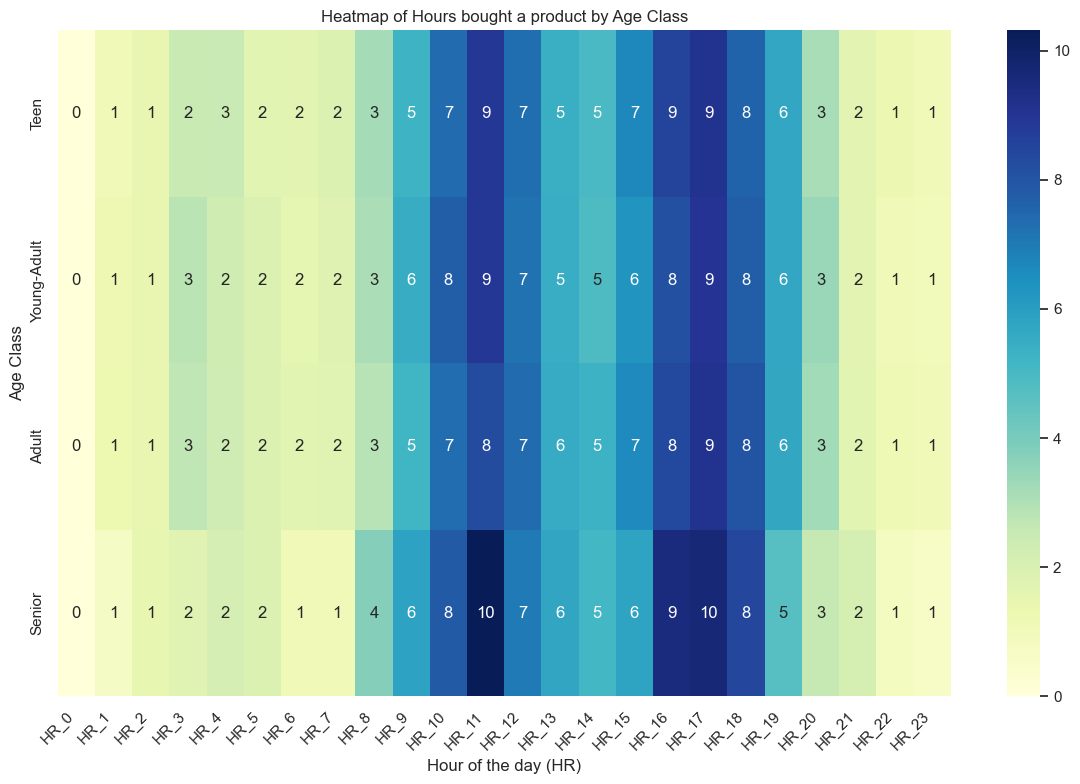

In [662]:
#Filter the columns that start with 'HR_'
hr_columns = [col for col in df.columns if col.startswith('HR_')]
df[hr_columns] = df[hr_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Group data by age class and sum cuisine types
age_hr_data = data.groupby('age_category')[hr_columns].sum()
age_hr_data['Total Spent'] = age_hr_data.sum(axis=1)

age_hr_percentage = age_hr_data.div(age_hr_data['Total Spent'], axis=0) * 100
age_hr_percentage.drop(columns=['Total Spent'], inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(age_hr_percentage, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Heatmap of Hours bought a product by Age Class')
plt.xlabel('Hour of the day (HR)')
plt.ylabel('Age Class')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Observations:**
- The most common hours that every age gap buys is between HR_10 and HR_19, that is the fact that customers buy a bit before the time of meals.

## Relation between customer_age and vendor_count

C:\Users\rodri\AppData\Local\Temp\ipykernel_57812\3059090975.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vendor = df.groupby(['age_category', 'vendor_count']).size().unstack(fill_value = 0)


Text(0.5, 1.0, 'Proportion of Vendor Count by Age Class')

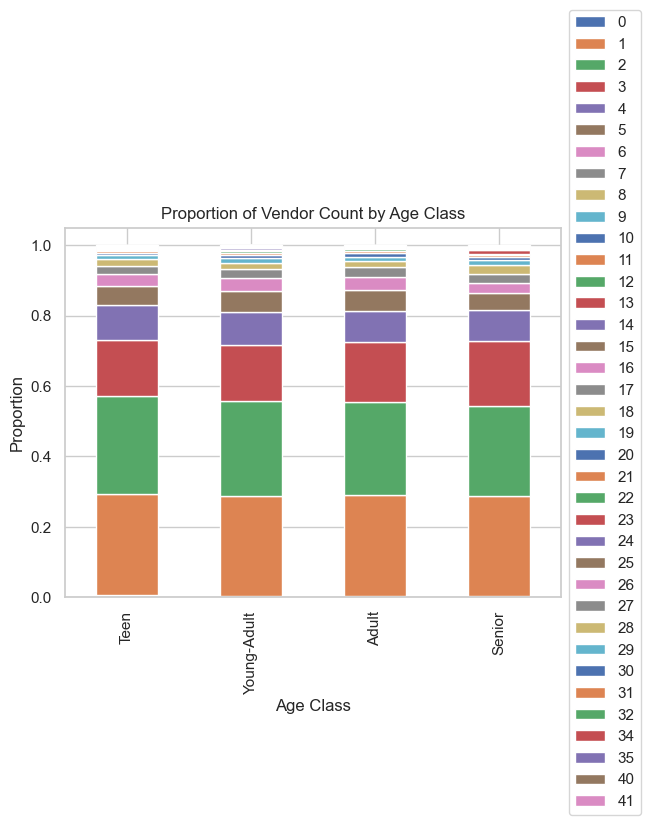

In [665]:
age_vendor = df.groupby(['age_category', 'vendor_count']).size().unstack(fill_value = 0)
vendor_proportions = age_vendor.div(age_vendor.sum(axis = 1), axis = 0)

#Plot
vendor_proportions.plot(kind = 'bar', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Age Class')
plt.ylabel('Proportion')
plt.title('Proportion of Vendor Count by Age Class')

<Axes: xlabel='vendor_count'>

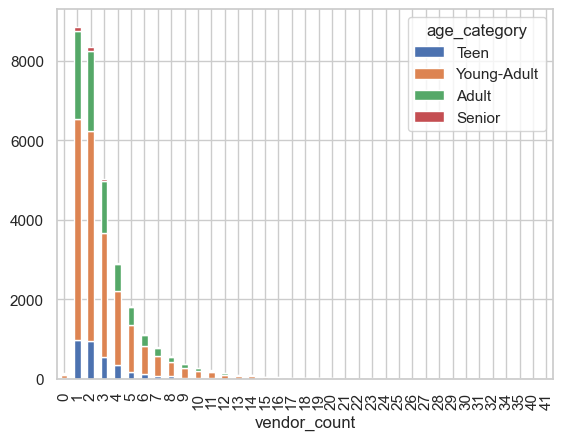

In [666]:
df['age_category'].groupby(df['vendor_count']).value_counts().unstack().plot(kind='bar', stacked=True)

## Relation between Cuisine and Region

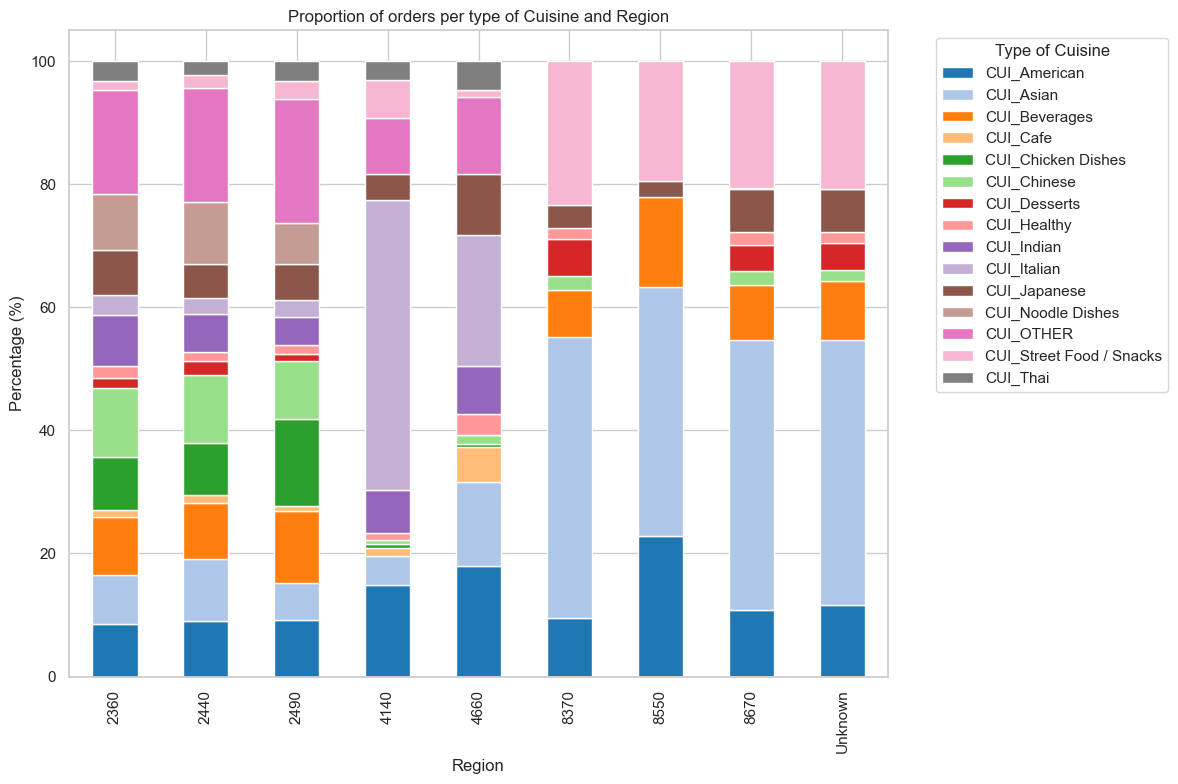

In [668]:
#cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
# Creating a new DataFrame that includes only 'customer_region' and the cuisine columns
region_cuisine_data = df[['customer_region'] + cuisine_columns]
# Summing the orders for each cuisine type by region
region_cuisine_summary = region_cuisine_data.groupby('customer_region').sum()
# Converting the summed data to percentages by dividing each value by the total for its row (region)
region_cuisine_percentage = region_cuisine_summary.div(region_cuisine_summary.sum(axis=1), axis=0) * 100
#ploting a bar plot
colors = plt.get_cmap("tab20").colors
region_cuisine_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title("Proportion of orders per type of Cuisine and Region")
plt.xlabel("Region")
plt.ylabel("Percentage (%)")
plt.legend(title="Type of Cuisine", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Relation  between costumer_time and last_promo

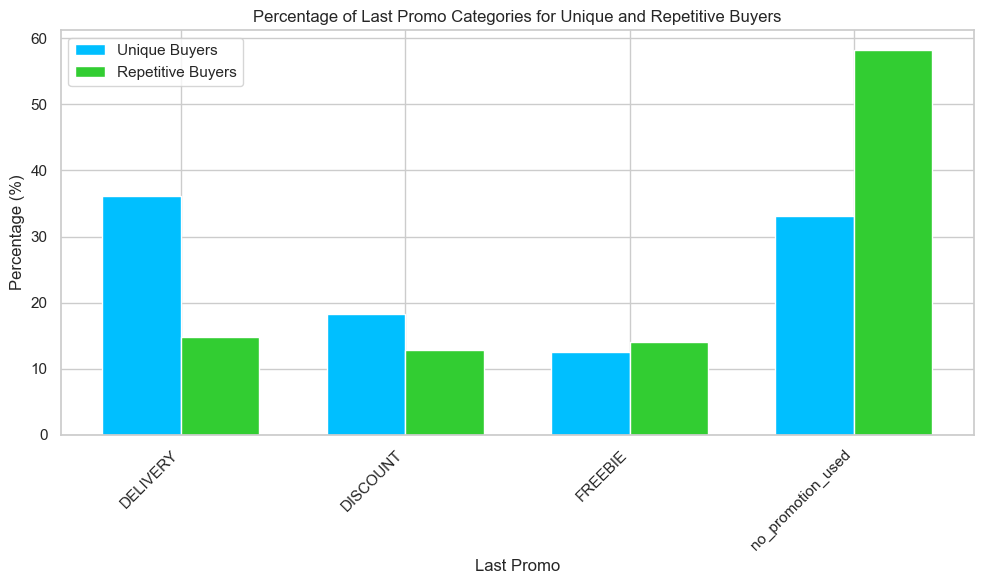

In [670]:
import matplotlib.pyplot as plt

# Filter unique buyers and repetitve buyers
unique_buyer = df[df['costumer_time'] == 0]
repetitive_buyer = df[df['costumer_time'] > 0]

# Calculate the porportion (%) of each category "last_promo" in each group
unique_percentages = (unique_buyer['last_promo'].value_counts(normalize=True) * 100).sort_index()
repetitive_percentages = (repetitive_buyer['last_promo'].value_counts(normalize=True) * 100).sort_index()

all_categories = unique_percentages.index.union(repetitive_percentages.index)
unique_percentages = unique_percentages.reindex(all_categories, fill_value=0)
repetitive_percentages = repetitive_percentages.reindex(all_categories, fill_value=0)

#Plot settings
fig, ax = plt.subplots(figsize=(10, 6))

#Plot settings
bar_width = 0.35
bar_positions = range(len(all_categories))

# Plot
ax.bar([pos - bar_width/2 for pos in bar_positions], unique_percentages, width=bar_width, label='Unique Buyers', color='deepskyblue')
ax.bar([pos + bar_width/2 for pos in bar_positions], repetitive_percentages, width=bar_width, label='Repetitive Buyers', color='limegreen')

# labels and title of the plot
ax.set_xticks(bar_positions)
ax.set_xticklabels(all_categories, rotation=45, ha='right')
ax.set_xlabel('Last Promo')
ax.set_ylabel('Percentage (%)')
ax.set_title('Percentage of Last Promo Categories for Unique and Repetitive Buyers')
ax.legend()

plt.tight_layout()
plt.show()

## Relation between total_spent and product intensity

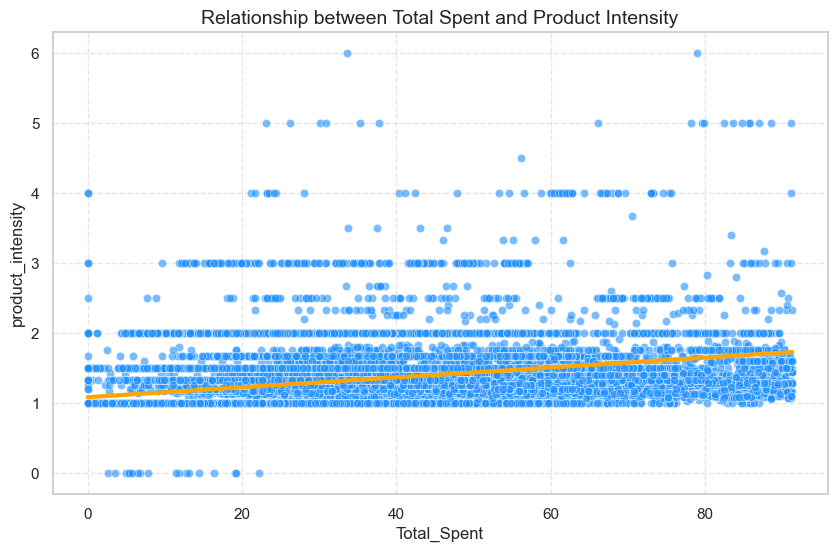

In [672]:
df_Total_Spent['product_intensity'] = df_Total_Spent['product_count'] / df_Total_Spent[df_Total_Spent['order_count']!=0]['order_count']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_Total_Spent, x='Total_Spent', y='product_intensity', color='dodgerblue', alpha=0.6)

# Adding labels and title
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Product Intensity (Avg Products per Order)', fontsize=12)
plt.title('Relationship between Total Spent and Product Intensity', fontsize=14)

# Adding a trendline to better observe the pattern
sns.regplot(data=df_Total_Spent, x='Total_Spent', y='product_intensity', scatter=False, color='orange', line_kws={"linewidth":3})

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Relation between last_promo and customer_region

C:\Users\rodri\AppData\Local\Temp\ipykernel_57812\3350446520.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_region', y='percentage', data=merged, ax=ax,
C:\Users\rodri\AppData\Local\Temp\ipykernel_57812\3350446520.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_region', y='percentage', data=merged, ax=ax,
C:\Users\rodri\AppData\Local\Temp\ipykernel_57812\3350446520.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_region', y='percentage', data=merged, ax=ax,
C:\Users\rodri\AppData\Local\Temp\

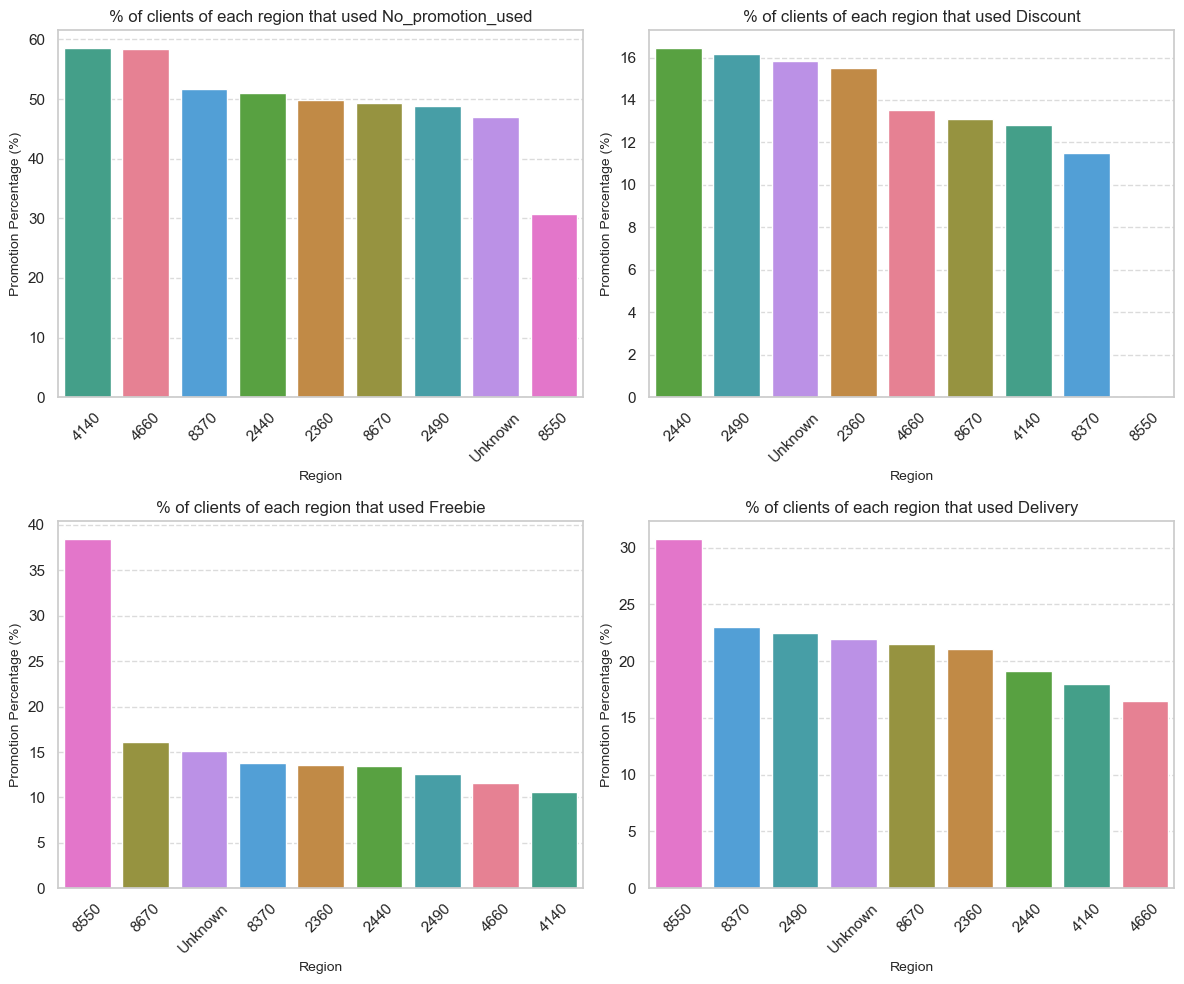

In [674]:
# Obtaining unique promotion types
promo_types = df['last_promo'].unique()
# Getting unique regions and generating colors
unique_regions = df['customer_region'].unique()  # Getting unique regions
region_colors = sns.color_palette("husl", len(unique_regions))  # Generating unique colors for the regions
# Creating a mapping of regions to colors
region_colors_dict = dict(zip(unique_regions, region_colors))
# Setting the style for Seaborn
sns.set(style="whitegrid")
# Creating a figure with a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flattening the axes array for easier access
# Function to plot graphs for each type of last_promo
def plot_last_promo(ax, df, promo_type):
    # Total count of promotions by region
    total_promos = df.groupby('customer_region').size().reset_index(name='total')

    # Count of specific promotions by region
    count = df[df['last_promo'] == promo_type].groupby('customer_region').size().reset_index(name='count')

    # Merging both counts to calculate the percentage
    merged = pd.merge(total_promos, count, on='customer_region', how='left').fillna(0)
    merged['percentage'] = (merged['count'] / merged['total']) * 100  # Calculating percentage

    # Sorting the data by percentage
    merged = merged.sort_values(by='percentage', ascending=False)

    # Creating the bar plot
    sns.barplot(x='customer_region', y='percentage', data=merged, ax=ax,
                palette=[region_colors_dict[region] for region in merged['customer_region']])

    # Setting the title and labels
    if promo_type == 'Unknown':
        ax.set_title("% of clients of each region that didn't use any promotions", fontsize=12)  # Custom title for 'unknown' promotion
    else:
        ax.set_title(f'% of clients of each region that used {promo_type.capitalize()}', fontsize=12)

    ax.set_xlabel('Region', fontsize=10)
    ax.set_ylabel('Promotion Percentage (%)', fontsize=10)
    ax.tick_params(axis='x', rotation=45)  # Rotating the x-axis labels
    ax.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
# Creating graphs for each type of last_promo
for i, promo in enumerate(promo_types):
    plot_last_promo(axes[i], df, promo)  # Plotting each promotion type
# Adjusting the layout for better spacing
plt.tight_layout()
plt.show()  # Displaying the plots